In [2]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# read data

with open('customer_service_reps', 'rb') as f:
    df_cs = pickle.load(f)
    
with open('engagement', 'rb') as f:
    df_eng = pickle.load(f)
    
with open('subscribers', 'rb') as f:
    df_sub = pickle.load(f)
    

## Feature Engineering

In [3]:
# First, define the scope of the analysis -- only customers in engagement data set will be considered
sub_set = set(df_eng['subid'].tolist())


# Slice other datasets

df_cs_s = df_cs.loc[df_cs['subid'].isin(sub_set)]

df_sub_s = df_sub.loc[df_sub['subid'].isin(sub_set)] 

In [4]:
df_cs_s

,customer_service_rep_id,subid,current_sub_TF,cancel_date,account_creation_date,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,renew
61,30034436,21697364,False,2020-04-08 13:16:39,2020-03-27 23:59:06,14,False,OTT,0.0000,0,2020-03-28 00:05:20,NaT,False
67,34138852,20407871,False,2020-04-01 05:42:28,2020-03-27 23:58:49,14,False,OTT,0.0000,0,2020-03-27 23:58:49,NaT,False
118,33808892,27818002,False,2020-04-08 22:00:59,2020-03-27 23:53:40,14,False,OTT,0.0000,0,2020-03-28 00:05:20,NaT,False
124,34413500,23796492,True,NaT,2020-03-27 23:52:29,14,True,OTT,4.5875,0,2020-03-28 07:10:03,2020-04-11 14:22:46,True
125,34413500,23796492,True,NaT,2020-03-27 23:52:29,14,True,OTT,4.5875,1,2020-04-11 14:22:46,NaT,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248380,34410719,29969407,False,2019-07-07 14:15:50,2019-06-30 00:01:31,14,False,OTT,0.0000,0,2019-06-30 01:05:36,NaT,False
2248385,38865556,27585257,False,NaT,2019-06-30 00:01:25,14,True,OTT,4.9178,0,2019-06-30 00:01:25,2019-07-14 14:33:09,True
2248386,38865556,27585257,False,NaT,2019-06-30 00:01:25,14,True,OTT,4.9178,1,2019-07-14 14:33:09,NaT,False
2248394,30947283,26986758,False,2019-07-12 23:23:24,2019-06-30 00:00:51,14,False,OTT,0.0000,0,2019-06-30 01:05:29,NaT,False


In [5]:
# Check missing values
df_sub_s.isna().sum().sort_values(ascending = False)

payment_type                    77536
num_ideal_streaming_services    55435
num_weekly_services_utilized    54224
creation_until_cancel_days      49269
preferred_genre                 25949
package_type                    25669
weekly_consumption_hour         24085
revenue_net                     22708
join_fee                        22708
age                             22708
intended_use                     2052
attribution_survey               1592
op_sys                              5
attribution_technical               0
retarget_TF                         0
male_TF                             0
country                             0
months_per_bill_period              0
refund_after_trial_TF               0
plan_type                           0
monthly_price                       0
discount_price                      0
account_creation_date               0
cancel_before_trial_end             0
trial_end_date                      0
initial_credit_card_declined        0
language    

In [6]:
# in subscriber dataset, drop top 4 columns with missing value

df_sub_s.dropna(axis = 1, thresh = 0.7 * df_sub_s.shape[0],inplace = True)

C:\Users\mabow\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
df_sub_s

,subid,package_type,preferred_genre,intended_use,weekly_consumption_hour,retarget_TF,age,male_TF,country,attribution_technical,...,discount_price,account_creation_date,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF
496617,26844789,enhanced,regional,replace OTT,36.001186,False,25.0,True,UAE,organic,...,4.5141,2019-12-07 16:37:06,False,2019-12-22,False,0.0000,0.1101,ar,False,False
192823,29726122,base,comedy,access to exclusive content,20.051667,False,61.0,False,UAE,bing,...,4.5141,2020-02-19 18:30:15,True,2020-03-05,False,4.5875,0.3303,ar,True,False
315863,20299962,base,drama,access to exclusive content,34.551230,False,23.0,False,UAE,email,...,4.5141,2020-03-05 14:52:22,True,2020-03-20,False,3.4498,0.0000,ar,True,False
254782,24930568,base,comedy,access to exclusive content,25.851492,False,73.0,False,UAE,facebook,...,4.5141,2020-02-23 17:50:25,False,2020-03-09,False,0.0000,0.6606,ar,False,False
290426,21361112,enhanced,comedy,access to exclusive content,37.451142,False,24.0,True,UAE,search,...,4.5141,2019-12-01 07:29:14,False,2019-12-16,False,0.0000,0.3303,ar,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230734,21928274,base,drama,replace OTT,NaN,False,NaN,False,UAE,facebook,...,4.5141,2020-01-14 02:04:52,True,2020-01-29,False,NaN,NaN,ar,True,False
577745,25549852,enhanced,comedy,access to exclusive content,28.751405,False,61.0,False,UAE,affiliate,...,4.5141,2020-03-06 02:57:03,False,2020-03-21,False,0.0000,0.3303,ar,False,False
603751,25835684,base,drama,access to exclusive content,24.401536,False,43.0,False,UAE,email,...,4.5141,2020-01-01 22:43:56,False,2020-01-16,False,0.0000,0.0000,ar,False,False
509326,21434712,enhanced,comedy,supplement OTT,28.751405,False,38.0,False,UAE,facebook,...,4.5141,2019-11-17 14:12:33,False,2019-12-02,False,0.0000,0.3303,ar,False,False


In [8]:
df_sub_s.columns

Index(['subid', 'package_type', 'preferred_genre', 'intended_use',
       'weekly_consumption_hour', 'retarget_TF', 'age', 'male_TF', 'country',
       'attribution_technical', 'attribution_survey', 'op_sys',
       'months_per_bill_period', 'plan_type', 'monthly_price',
       'discount_price', 'account_creation_date', 'cancel_before_trial_end',
       'trial_end_date', 'initial_credit_card_declined', 'revenue_net',
       'join_fee', 'language', 'paid_TF', 'refund_after_trial_TF'],
      dtype='object')

In [9]:
# Reverse cancel_before_trial_end columns

df_sub_s['cancel_before_trial_end'] = ~df_sub_s['cancel_before_trial_end']

C:\Users\mabow\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
# Drop columns with same information
def drop_useless_col(df):
    '''
    Drop columns with all information are same
    '''
    
    to_drop = []
    
    for col in df.columns:
        if df[col].nunique() <= 1:
            to_drop.append(col)
            
    result = df.drop(to_drop, axis = 1)
    
    return result

In [11]:
df_sub_model = drop_useless_col(df_sub_s)

In [12]:
df_sub_model

# May consider to drop attribution information -- see clustering result
# May also consider to drop retarget_TF

,subid,package_type,preferred_genre,intended_use,weekly_consumption_hour,retarget_TF,age,male_TF,attribution_technical,attribution_survey,...,monthly_price,discount_price,account_creation_date,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,paid_TF,refund_after_trial_TF
496617,26844789,enhanced,regional,replace OTT,36.001186,False,25.0,True,organic,facebook,...,4.7343,4.5141,2019-12-07 16:37:06,True,2019-12-22,False,0.0000,0.1101,False,False
192823,29726122,base,comedy,access to exclusive content,20.051667,False,61.0,False,bing,search,...,4.7343,4.5141,2020-02-19 18:30:15,False,2020-03-05,False,4.5875,0.3303,True,False
315863,20299962,base,drama,access to exclusive content,34.551230,False,23.0,False,email,referral,...,4.7343,4.5141,2020-03-05 14:52:22,False,2020-03-20,False,3.4498,0.0000,True,False
254782,24930568,base,comedy,access to exclusive content,25.851492,False,73.0,False,facebook,facebook,...,4.7343,4.5141,2020-02-23 17:50:25,True,2020-03-09,False,0.0000,0.6606,False,False
290426,21361112,enhanced,comedy,access to exclusive content,37.451142,False,24.0,True,search,search,...,4.7343,4.5141,2019-12-01 07:29:14,True,2019-12-16,False,0.0000,0.3303,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230734,21928274,base,drama,replace OTT,NaN,False,NaN,False,facebook,facebook,...,4.7343,4.5141,2020-01-14 02:04:52,False,2020-01-29,False,NaN,NaN,True,False
577745,25549852,enhanced,comedy,access to exclusive content,28.751405,False,61.0,False,affiliate,facebook,...,4.7343,4.5141,2020-03-06 02:57:03,True,2020-03-21,False,0.0000,0.3303,False,False
603751,25835684,base,drama,access to exclusive content,24.401536,False,43.0,False,email,pinterest,...,4.7343,4.5141,2020-01-01 22:43:56,True,2020-01-16,False,0.0000,0.0000,False,False
509326,21434712,enhanced,comedy,supplement OTT,28.751405,False,38.0,False,facebook,facebook_organic,...,4.7343,4.5141,2019-11-17 14:12:33,True,2019-12-02,False,0.0000,0.3303,False,False


### Check data period

In [13]:
df_sub_model['account_creation_date'].max()

Timestamp('2020-03-27 23:59:06')

In [14]:
df_sub_model['account_creation_date'].max() + pd.DateOffset(days = 14)

Timestamp('2020-04-10 23:59:06')

In [15]:
df_cs_s['last_payment'].max()

Timestamp('2020-04-22 11:05:24')

In [16]:
df_eng['date'].max()

Timestamp('2020-04-25 00:00:00')

### Check discrepency between Revenue_Net and Revenue_Net_1month

In [17]:
# Obtain information cust_service data sets at per customer level

# Check revenue_net_1month and revenue column information

df_sub_model['revenue_net'].isna().sum()

22708

In [18]:
# Check if anyone in cust_service data set have different revenue_net_1month

df_cs_s[['subid', 'revenue_net_1month', 'payment_period']].groupby(
    ['subid', 'revenue_net_1month']).count().shape[0] == df_cs_s['subid'].nunique()

# The result shows one customer will only have one value of revenue_net_1month

True

In [19]:
df_cs_s[['subid', 'revenue_net_1month', 'payment_period']].groupby(
    ['subid', 'revenue_net_1month']).count()

,,payment_period
subid,revenue_net_1month,
20000062,0.0000,1
20000405,0.0000,1
20000604,4.5875,2
20000685,3.6700,2
20000741,0.0000,1
...,...,...
29999740,0.0000,1
29999820,0.0000,1
29999822,0.0000,1


In [20]:
# Obtain information from engagement and cust_service data sets at per customer level

# Check revenue_net_1month and revenue column information

df_check_rev = df_cs_s[['subid', 'revenue_net_1month', 'payment_period']].groupby(
    ['subid', 'revenue_net_1month']).count().reset_index()[['subid', 'revenue_net_1month']].merge(
    df_sub_model[['subid', 'revenue_net']], how = 'right', on = 'subid')


df_check_rev.loc[df_check_rev['revenue_net'] != df_check_rev['revenue_net_1month']]


,subid,revenue_net_1month,revenue_net
2,20000604,4.5875,NaN
6,20000809,4.7343,14.2029
10,20001112,4.5875,NaN
15,20001231,4.5875,9.1750
22,20001800,4.9545,9.9090
...,...,...,...
135004,29998731,4.9545,14.8268
135007,29999005,3.4498,NaN
135008,29999052,4.9545,NaN
135010,29999206,4.5875,NaN


In [21]:
print(df_check_rev.shape[0])

135019


In [22]:
df_check_rev.isna().sum()

subid                     0
revenue_net_1month        0
revenue_net           22708
dtype: int64

In [23]:
df_check_rev.describe()

,subid,revenue_net_1month,revenue_net
count,1.350190e+05,135019.000000,112311.000000
mean,2.498882e+07,1.759095,1.708015
std,2.889306e+06,2.210575,3.172083
min,2.000006e+07,-5.578400,-5.982100
25%,2.248572e+07,0.000000,0.000000
50%,2.498062e+07,0.000000,0.000000
75%,2.749941e+07,4.587500,3.670000
max,2.999994e+07,5.468300,15.634200


In [24]:
# Seems like revenue_net is a cumulative result where customers with multiple subscription will have a higher revenue_net
# On the other hand, revenue_net_1month is reflecting the monthly revenue generated for a certain customer for lastest period
# Use revenue_net_1month for prediction model

df_cs_model = df_check_rev[['subid', 'revenue_net_1month']]

### Calculate number of customer services record per customer

In [25]:
df_cs_model = df_cs_model.merge(df_cs_s.groupby('subid').count().reset_index()[['subid', 'customer_service_rep_id']], how = 'left', on = 'subid')

In [26]:
df_cs_model.columns = ['subid', 'revenue_net_1month', 'num_cust_services']

In [27]:
df_cs_model

,subid,revenue_net_1month,num_cust_services
0,20000062,0.0000,1
1,20000405,0.0000,1
2,20000604,4.5875,2
3,20000685,3.6700,2
4,20000741,0.0000,1
...,...,...,...
135014,29999740,0.0000,1
135015,29999820,0.0000,1
135016,29999822,0.0000,1
135017,29999889,4.5875,3


In [28]:
df_cs_s

,customer_service_rep_id,subid,current_sub_TF,cancel_date,account_creation_date,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,renew
61,30034436,21697364,False,2020-04-08 13:16:39,2020-03-27 23:59:06,14,False,OTT,0.0000,0,2020-03-28 00:05:20,NaT,False
67,34138852,20407871,False,2020-04-01 05:42:28,2020-03-27 23:58:49,14,False,OTT,0.0000,0,2020-03-27 23:58:49,NaT,False
118,33808892,27818002,False,2020-04-08 22:00:59,2020-03-27 23:53:40,14,False,OTT,0.0000,0,2020-03-28 00:05:20,NaT,False
124,34413500,23796492,True,NaT,2020-03-27 23:52:29,14,True,OTT,4.5875,0,2020-03-28 07:10:03,2020-04-11 14:22:46,True
125,34413500,23796492,True,NaT,2020-03-27 23:52:29,14,True,OTT,4.5875,1,2020-04-11 14:22:46,NaT,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248380,34410719,29969407,False,2019-07-07 14:15:50,2019-06-30 00:01:31,14,False,OTT,0.0000,0,2019-06-30 01:05:36,NaT,False
2248385,38865556,27585257,False,NaT,2019-06-30 00:01:25,14,True,OTT,4.9178,0,2019-06-30 00:01:25,2019-07-14 14:33:09,True
2248386,38865556,27585257,False,NaT,2019-06-30 00:01:25,14,True,OTT,4.9178,1,2019-07-14 14:33:09,NaT,False
2248394,30947283,26986758,False,2019-07-12 23:23:24,2019-06-30 00:00:51,14,False,OTT,0.0000,0,2019-06-30 01:05:29,NaT,False


In [29]:
df_sub_model

,subid,package_type,preferred_genre,intended_use,weekly_consumption_hour,retarget_TF,age,male_TF,attribution_technical,attribution_survey,...,monthly_price,discount_price,account_creation_date,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,paid_TF,refund_after_trial_TF
496617,26844789,enhanced,regional,replace OTT,36.001186,False,25.0,True,organic,facebook,...,4.7343,4.5141,2019-12-07 16:37:06,True,2019-12-22,False,0.0000,0.1101,False,False
192823,29726122,base,comedy,access to exclusive content,20.051667,False,61.0,False,bing,search,...,4.7343,4.5141,2020-02-19 18:30:15,False,2020-03-05,False,4.5875,0.3303,True,False
315863,20299962,base,drama,access to exclusive content,34.551230,False,23.0,False,email,referral,...,4.7343,4.5141,2020-03-05 14:52:22,False,2020-03-20,False,3.4498,0.0000,True,False
254782,24930568,base,comedy,access to exclusive content,25.851492,False,73.0,False,facebook,facebook,...,4.7343,4.5141,2020-02-23 17:50:25,True,2020-03-09,False,0.0000,0.6606,False,False
290426,21361112,enhanced,comedy,access to exclusive content,37.451142,False,24.0,True,search,search,...,4.7343,4.5141,2019-12-01 07:29:14,True,2019-12-16,False,0.0000,0.3303,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230734,21928274,base,drama,replace OTT,NaN,False,NaN,False,facebook,facebook,...,4.7343,4.5141,2020-01-14 02:04:52,False,2020-01-29,False,NaN,NaN,True,False
577745,25549852,enhanced,comedy,access to exclusive content,28.751405,False,61.0,False,affiliate,facebook,...,4.7343,4.5141,2020-03-06 02:57:03,True,2020-03-21,False,0.0000,0.3303,False,False
603751,25835684,base,drama,access to exclusive content,24.401536,False,43.0,False,email,pinterest,...,4.7343,4.5141,2020-01-01 22:43:56,True,2020-01-16,False,0.0000,0.0000,False,False
509326,21434712,enhanced,comedy,supplement OTT,28.751405,False,38.0,False,facebook,facebook_organic,...,4.7343,4.5141,2019-11-17 14:12:33,True,2019-12-02,False,0.0000,0.3303,False,False


In [30]:
df_cs_model

,subid,revenue_net_1month,num_cust_services
0,20000062,0.0000,1
1,20000405,0.0000,1
2,20000604,4.5875,2
3,20000685,3.6700,2
4,20000741,0.0000,1
...,...,...,...
135014,29999740,0.0000,1
135015,29999820,0.0000,1
135016,29999822,0.0000,1
135017,29999889,4.5875,3


In [31]:
# Obtain information from engagement data set at per customer level 

# Daily Average

df_eng_daily = df_eng.groupby(by = ['subid', 'payment_period']).mean()

col = list(df_eng_daily.columns)

for i in range(len(col)):
    col[i] = 'daily_' + col[i]
    
df_eng_daily.columns = col

df_eng_daily = df_eng_daily.unstack(level = 1)

col2 = []
for i in col:
    for j in range(4):
        col2.append(i + '_period_' + str(j))
        
df_eng_daily.columns = col2

df_eng_daily

,daily_app_opens_period_0,daily_app_opens_period_1,daily_app_opens_period_2,daily_app_opens_period_3,daily_cust_service_mssgs_period_0,daily_cust_service_mssgs_period_1,daily_cust_service_mssgs_period_2,daily_cust_service_mssgs_period_3,daily_num_videos_completed_period_0,daily_num_videos_completed_period_1,...,daily_num_videos_more_than_30_seconds_period_2,daily_num_videos_more_than_30_seconds_period_3,daily_num_videos_rated_period_0,daily_num_videos_rated_period_1,daily_num_videos_rated_period_2,daily_num_videos_rated_period_3,daily_num_series_started_period_0,daily_num_series_started_period_1,daily_num_series_started_period_2,daily_num_series_started_period_3
subid,,,,,,,,,,,,,,,,,,,,,
20000062,1.000000,NaN,NaN,NaN,0.750000,NaN,NaN,NaN,1.500000,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,0.250000,NaN,NaN,NaN
20000405,1.250000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,3.250000,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,0.250000,NaN,NaN,NaN
20000604,1.000000,0.500000,NaN,NaN,0.307692,0.500000,NaN,NaN,0.615385,0.000000,...,NaN,NaN,0.0,0.000000,NaN,NaN,0.076923,0.000000,NaN,NaN
20000685,1.307692,1.160000,NaN,NaN,0.307692,0.240000,NaN,NaN,0.846154,0.120000,...,NaN,NaN,0.0,0.000000,NaN,NaN,0.538462,0.040000,NaN,NaN
20000741,0.500000,NaN,NaN,NaN,0.500000,NaN,NaN,NaN,1.000000,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29999740,1.071429,NaN,NaN,NaN,0.214286,NaN,NaN,NaN,0.785714,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
29999820,1.200000,NaN,NaN,NaN,0.600000,NaN,NaN,NaN,2.200000,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,0.700000,NaN,NaN,NaN
29999822,1.000000,NaN,NaN,NaN,0.800000,NaN,NaN,NaN,0.400000,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,0.200000,NaN,NaN,NaN


In [32]:
df_eng_daily.columns

Index(['daily_app_opens_period_0', 'daily_app_opens_period_1',
       'daily_app_opens_period_2', 'daily_app_opens_period_3',
       'daily_cust_service_mssgs_period_0',
       'daily_cust_service_mssgs_period_1',
       'daily_cust_service_mssgs_period_2',
       'daily_cust_service_mssgs_period_3',
       'daily_num_videos_completed_period_0',
       'daily_num_videos_completed_period_1',
       'daily_num_videos_completed_period_2',
       'daily_num_videos_completed_period_3',
       'daily_num_videos_more_than_30_seconds_period_0',
       'daily_num_videos_more_than_30_seconds_period_1',
       'daily_num_videos_more_than_30_seconds_period_2',
       'daily_num_videos_more_than_30_seconds_period_3',
       'daily_num_videos_rated_period_0', 'daily_num_videos_rated_period_1',
       'daily_num_videos_rated_period_2', 'daily_num_videos_rated_period_3',
       'daily_num_series_started_period_0',
       'daily_num_series_started_period_1',
       'daily_num_series_started_period_2',


In [33]:
# Calculate Change compared with previous period

df_eng_delta = pd.DataFrame(index = df_eng_daily.index)

for col in df_eng_daily.columns:
    if not 'period_0' in col: 
        
        col_ind = df_eng_daily.columns.get_loc(col)
        name = str(col)
        name = ('delta_to_previous_' + name)
        
        df_eng_delta[name] = df_eng_daily.iloc[:, col_ind] - df_eng_daily.iloc[:, col_ind - 1]
        

In [34]:
df_eng_daily = df_eng_daily.merge(df_eng_delta, left_index = True, right_index = True)

In [35]:
df_eng_daily.columns

Index(['daily_app_opens_period_0', 'daily_app_opens_period_1',
       'daily_app_opens_period_2', 'daily_app_opens_period_3',
       'daily_cust_service_mssgs_period_0',
       'daily_cust_service_mssgs_period_1',
       'daily_cust_service_mssgs_period_2',
       'daily_cust_service_mssgs_period_3',
       'daily_num_videos_completed_period_0',
       'daily_num_videos_completed_period_1',
       'daily_num_videos_completed_period_2',
       'daily_num_videos_completed_period_3',
       'daily_num_videos_more_than_30_seconds_period_0',
       'daily_num_videos_more_than_30_seconds_period_1',
       'daily_num_videos_more_than_30_seconds_period_2',
       'daily_num_videos_more_than_30_seconds_period_3',
       'daily_num_videos_rated_period_0', 'daily_num_videos_rated_period_1',
       'daily_num_videos_rated_period_2', 'daily_num_videos_rated_period_3',
       'daily_num_series_started_period_0',
       'daily_num_series_started_period_1',
       'daily_num_series_started_period_2',


In [36]:
df_eng_daily = df_eng_daily.fillna(0)

## Churn Identification

In [37]:
# To identify churn, if a certain customer does not have engagement records in certain period, this customer will be considered as churned
# Time also matters, for customers who create their account in later period, they simply will not have the chance to finish their trial
# or their latest period

df_eng['date'].max()

# 2020-04-25 is the latest engagement time
# Customer who create their account within 14 days to this date will not be able to finish their trial
# Customer who create their account within 4 month and 14 days to this date will not be able to finish their first period, etc

time_finish_trial = df_eng['date'].max() - pd.DateOffset(days = 14)
time_finish_period_1 = df_eng['date'].max() - pd.DateOffset(months = 4, days = 14)
time_finish_period_2 = df_eng['date'].max() - pd.DateOffset(months = 8, days = 14)
time_finish_period_3 = df_eng['date'].max() - pd.DateOffset(months = 12, days = 14)

In [38]:
df_sub_model

,subid,package_type,preferred_genre,intended_use,weekly_consumption_hour,retarget_TF,age,male_TF,attribution_technical,attribution_survey,...,monthly_price,discount_price,account_creation_date,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,paid_TF,refund_after_trial_TF
496617,26844789,enhanced,regional,replace OTT,36.001186,False,25.0,True,organic,facebook,...,4.7343,4.5141,2019-12-07 16:37:06,True,2019-12-22,False,0.0000,0.1101,False,False
192823,29726122,base,comedy,access to exclusive content,20.051667,False,61.0,False,bing,search,...,4.7343,4.5141,2020-02-19 18:30:15,False,2020-03-05,False,4.5875,0.3303,True,False
315863,20299962,base,drama,access to exclusive content,34.551230,False,23.0,False,email,referral,...,4.7343,4.5141,2020-03-05 14:52:22,False,2020-03-20,False,3.4498,0.0000,True,False
254782,24930568,base,comedy,access to exclusive content,25.851492,False,73.0,False,facebook,facebook,...,4.7343,4.5141,2020-02-23 17:50:25,True,2020-03-09,False,0.0000,0.6606,False,False
290426,21361112,enhanced,comedy,access to exclusive content,37.451142,False,24.0,True,search,search,...,4.7343,4.5141,2019-12-01 07:29:14,True,2019-12-16,False,0.0000,0.3303,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230734,21928274,base,drama,replace OTT,NaN,False,NaN,False,facebook,facebook,...,4.7343,4.5141,2020-01-14 02:04:52,False,2020-01-29,False,NaN,NaN,True,False
577745,25549852,enhanced,comedy,access to exclusive content,28.751405,False,61.0,False,affiliate,facebook,...,4.7343,4.5141,2020-03-06 02:57:03,True,2020-03-21,False,0.0000,0.3303,False,False
603751,25835684,base,drama,access to exclusive content,24.401536,False,43.0,False,email,pinterest,...,4.7343,4.5141,2020-01-01 22:43:56,True,2020-01-16,False,0.0000,0.0000,False,False
509326,21434712,enhanced,comedy,supplement OTT,28.751405,False,38.0,False,facebook,facebook_organic,...,4.7343,4.5141,2019-11-17 14:12:33,True,2019-12-02,False,0.0000,0.3303,False,False


In [39]:
# Based on account creation date, determine customers' max_period possible to reach

def max_period(date):
    if date <= time_finish_period_3:
        result = 4
    elif (date <= time_finish_period_2) and (date > time_finish_period_3):
        result = 3
    elif (date <= time_finish_period_1) and (date > time_finish_period_2):
        result = 2
    elif (date <= time_finish_trial) and (date > time_finish_period_1):
        result = 1
    else:
        result = np.nan
        
    return result
        
        
df_sub_model['max_period'] = df_sub_model.apply(lambda x: max_period(x['account_creation_date']), axis = 1)

In [40]:
df_sub_model[['subid','account_creation_date', 'max_period']].sort_values(by = 'max_period', ascending = False)

,subid,account_creation_date,max_period
13514,27521576,2019-07-04 14:01:41,3
524997,20568274,2019-07-19 21:43:43,3
17802,21042741,2019-07-03 18:08:14,3
21072,25763676,2019-07-15 05:04:38,3
499551,23083125,2019-07-03 04:00:34,3
...,...,...,...
205909,20923166,2020-02-07 21:34:57,1
388874,27696016,2020-02-16 14:06:37,1
329653,24510052,2020-03-06 16:59:34,1
145461,21150023,2020-02-13 15:20:08,1


In [41]:
df_churn = df_sub_model[['subid', 'account_creation_date', 'max_period']].merge(df_eng[['subid', 'payment_period']].groupby(by = ['subid']).max().reset_index(), on = 'subid')

In [42]:
df_churn.rename({'payment_period': 'latest_eng_record_period'},axis = 'columns', inplace = True)

df_churn

,subid,account_creation_date,max_period,latest_eng_record_period
0,26844789,2019-12-07 16:37:06,2,0.0
1,29726122,2020-02-19 18:30:15,1,1.0
2,20299962,2020-03-05 14:52:22,1,1.0
3,24930568,2020-02-23 17:50:25,1,0.0
4,21361112,2019-12-01 07:29:14,2,0.0
...,...,...,...,...
135014,21928274,2020-01-14 02:04:52,1,1.0
135015,25549852,2020-03-06 02:57:03,1,0.0
135016,25835684,2020-01-01 22:43:56,1,0.0
135017,21434712,2019-11-17 14:12:33,2,0.0


In [43]:
def churn_det(row):
    if row.latest_eng_record_period < row.max_period:
        result = True
    else:
        result = False
    
    return result

df_churn['Churn'] = df_churn.apply(churn_det, axis = 1)

In [44]:
df_churn

,subid,account_creation_date,max_period,latest_eng_record_period,Churn
0,26844789,2019-12-07 16:37:06,2,0.0,True
1,29726122,2020-02-19 18:30:15,1,1.0,False
2,20299962,2020-03-05 14:52:22,1,1.0,False
3,24930568,2020-02-23 17:50:25,1,0.0,True
4,21361112,2019-12-01 07:29:14,2,0.0,True
...,...,...,...,...,...
135014,21928274,2020-01-14 02:04:52,1,1.0,False
135015,25549852,2020-03-06 02:57:03,1,0.0,True
135016,25835684,2020-01-01 22:43:56,1,0.0,True
135017,21434712,2019-11-17 14:12:33,2,0.0,True


In [45]:
df_churn['Churn'].value_counts()

True     104270
False     30749
Name: Churn, dtype: int64

In [46]:
df_churn['Churn'].value_counts()[1]/df_churn.shape[0]

0.7722616816892437

### Data Cleaning

In [47]:
df_sub_model.describe()

,subid,weekly_consumption_hour,age,monthly_price,discount_price,revenue_net,join_fee,max_period
count,1.350190e+05,110934.000000,1.123110e+05,135019.000000,135019.000000,112311.000000,112311.000000,135019.000000
mean,2.498882e+07,27.956766,2.253984e+02,4.734191,4.514282,1.708015,0.114096,1.788319
std,2.889306e+06,4.836245,3.273229e+04,0.053473,0.053319,3.172083,0.174134,0.732733
min,2.000006e+07,-32.146760,0.000000e+00,1.064300,1.027600,-5.982100,-0.660600,1.000000
25%,2.248572e+07,24.401536,3.500000e+01,4.734300,4.514100,0.000000,0.036700,1.000000
50%,2.498062e+07,27.301448,4.600000e+01,4.734300,4.514100,0.000000,0.036700,2.000000
75%,2.749941e+07,30.201361,5.600000e+01,4.734300,4.514100,3.670000,0.110100,2.000000
max,2.999994e+07,76.599962,8.061990e+06,5.101300,5.027900,15.634200,0.734000,3.000000


In [48]:
# Clean outliers in age columns

def age_process(age):
    if not ((age >=0) and (age <= 100)):
        return np.nan
    else:
        return age
    
    
df_sub_model['age'] = df_sub_model.apply(lambda x: age_process(x['age']), axis = 1)

In [49]:
df_sub_model.describe()

,subid,weekly_consumption_hour,age,monthly_price,discount_price,revenue_net,join_fee,max_period
count,1.350190e+05,110934.000000,111877.000000,135019.000000,135019.000000,112311.000000,112311.000000,135019.000000
mean,2.498882e+07,27.956766,45.743460,4.734191,4.514282,1.708015,0.114096,1.788319
std,2.889306e+06,4.836245,13.647052,0.053473,0.053319,3.172083,0.174134,0.732733
min,2.000006e+07,-32.146760,0.000000,1.064300,1.027600,-5.982100,-0.660600,1.000000
25%,2.248572e+07,24.401536,35.000000,4.734300,4.514100,0.000000,0.036700,1.000000
50%,2.498062e+07,27.301448,46.000000,4.734300,4.514100,0.000000,0.036700,2.000000
75%,2.749941e+07,30.201361,56.000000,4.734300,4.514100,3.670000,0.110100,2.000000
max,2.999994e+07,76.599962,99.000000,5.101300,5.027900,15.634200,0.734000,3.000000


In [50]:
df_sub_model.isna().sum()

subid                               0
package_type                    25669
preferred_genre                 25949
intended_use                     2052
weekly_consumption_hour         24085
retarget_TF                         0
age                             23142
male_TF                             0
attribution_technical               0
attribution_survey               1592
op_sys                              5
plan_type                           0
monthly_price                       0
discount_price                      0
account_creation_date               0
cancel_before_trial_end             0
trial_end_date                      0
initial_credit_card_declined        0
revenue_net                     22708
join_fee                        22708
paid_TF                             0
refund_after_trial_TF               0
max_period                          0
dtype: int64

In [51]:
# Drop unreliable and/or not useful columns
col_drop = ['monthly_price', 'account_creation_date', 'trial_end_date', 'plan_type']

df_sub_model.drop(col_drop, axis = 1, inplace = True)

In [52]:
df_sub_model

,subid,package_type,preferred_genre,intended_use,weekly_consumption_hour,retarget_TF,age,male_TF,attribution_technical,attribution_survey,op_sys,discount_price,cancel_before_trial_end,initial_credit_card_declined,revenue_net,join_fee,paid_TF,refund_after_trial_TF,max_period
496617,26844789,enhanced,regional,replace OTT,36.001186,False,25.0,True,organic,facebook,iOS,4.5141,True,False,0.0000,0.1101,False,False,2
192823,29726122,base,comedy,access to exclusive content,20.051667,False,61.0,False,bing,search,Android,4.5141,False,False,4.5875,0.3303,True,False,1
315863,20299962,base,drama,access to exclusive content,34.551230,False,23.0,False,email,referral,iOS,4.5141,False,False,3.4498,0.0000,True,False,1
254782,24930568,base,comedy,access to exclusive content,25.851492,False,73.0,False,facebook,facebook,iOS,4.5141,True,False,0.0000,0.6606,False,False,1
290426,21361112,enhanced,comedy,access to exclusive content,37.451142,False,24.0,True,search,search,iOS,4.5141,True,False,0.0000,0.3303,False,False,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230734,21928274,base,drama,replace OTT,NaN,False,NaN,False,facebook,facebook,Android,4.5141,False,False,NaN,NaN,True,False,1
577745,25549852,enhanced,comedy,access to exclusive content,28.751405,False,61.0,False,affiliate,facebook,Android,4.5141,True,False,0.0000,0.3303,False,False,1
603751,25835684,base,drama,access to exclusive content,24.401536,False,43.0,False,email,pinterest,iOS,4.5141,True,False,0.0000,0.0000,False,False,1
509326,21434712,enhanced,comedy,supplement OTT,28.751405,False,38.0,False,facebook,facebook_organic,iOS,4.5141,True,False,0.0000,0.3303,False,False,2


In [53]:
df_sub_model = df_sub_model.merge(df_churn[['subid', 'latest_eng_record_period', 'Churn']], on = 'subid')

In [54]:
df_sub_model_dummies = pd.get_dummies(data = df_sub_model, columns = df_sub_model.select_dtypes(include = ['object']).columns)

In [55]:
df_sub_model_dummies.columns

Index(['subid', 'weekly_consumption_hour', 'retarget_TF', 'age',
       'discount_price', 'cancel_before_trial_end',
       'initial_credit_card_declined', 'revenue_net', 'join_fee', 'paid_TF',
       'refund_after_trial_TF', 'max_period', 'latest_eng_record_period',
       'Churn', 'package_type_base', 'package_type_economy',
       'package_type_enhanced', 'preferred_genre_comedy',
       'preferred_genre_drama', 'preferred_genre_international',
       'preferred_genre_other', 'preferred_genre_regional',
       'intended_use_access to exclusive content', 'intended_use_education',
       'intended_use_expand international access',
       'intended_use_expand regional access', 'intended_use_other',
       'intended_use_replace OTT', 'intended_use_supplement OTT',
       'male_TF_False', 'male_TF_True', 'attribution_technical_affiliate',
       'attribution_technical_appstore', 'attribution_technical_bing',
       'attribution_technical_bing_organic',
       'attribution_technical_brand

In [56]:
df_model = df_sub_model_dummies.merge(df_eng_daily, on = 'subid')
df_model = df_model.merge(df_cs_model, on = 'subid')

In [57]:
df_model.columns

Index(['subid', 'weekly_consumption_hour', 'retarget_TF', 'age',
       'discount_price', 'cancel_before_trial_end',
       'initial_credit_card_declined', 'revenue_net', 'join_fee', 'paid_TF',
       ...
       'delta_to_previous_daily_num_videos_more_than_30_seconds_period_2',
       'delta_to_previous_daily_num_videos_more_than_30_seconds_period_3',
       'delta_to_previous_daily_num_videos_rated_period_1',
       'delta_to_previous_daily_num_videos_rated_period_2',
       'delta_to_previous_daily_num_videos_rated_period_3',
       'delta_to_previous_daily_num_series_started_period_1',
       'delta_to_previous_daily_num_series_started_period_2',
       'delta_to_previous_daily_num_series_started_period_3',
       'revenue_net_1month', 'num_cust_services'],
      dtype='object', length=126)

### Fill Missing Values

In [58]:
# Unable to use KNN to impute missing value because data set is too large

df_model = df_model.set_index('subid')


In [59]:
df_model.columns[df_model.isna().any()]

Index(['weekly_consumption_hour', 'age', 'revenue_net', 'join_fee'], dtype='object')

In [60]:
# Use average for weekly_consumption_hour ,age, revenue_net and join_fee

from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy = 'mean')

df_model[['weekly_consumption_hour', 'age']] = imp.fit_transform(df_model[['weekly_consumption_hour', 'age']])

imp = SimpleImputer(strategy = 'mean')

df_model[['revenue_net', 'join_fee']] = imp.fit_transform(df_model[['revenue_net', 'join_fee']])


In [61]:
df_model.columns[df_model.isna().any()]

Index([], dtype='object')

In [62]:
df_model[['num_cust_services', 'max_period', 'latest_eng_record_period']].corr()

,num_cust_services,max_period,latest_eng_record_period
num_cust_services,1.000000,0.152651,0.930217
max_period,0.152651,1.000000,0.134134
latest_eng_record_period,0.930217,0.134134,1.000000


In [63]:
# Since num_cust_services are highly correlated with latest_eng_record_period, drop num_cust_services

df_model.drop(['num_cust_services'], axis  = 1, inplace = True)

## Customer Segmentation

scope -- segment customers based on trial period engagement records and self-reported information 

In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()

def SSE(df, max_n):
    '''
    Return SSE with different number of clusters
    
    Inputs:
        df -> (pandas dataframe) Dataframe with all features
        max_n -> (int) maximum number of clusters to test
        
    Return:
        result -> (list) a list contain SSEs for different number of clusters, starts at 1
    
    '''
    
    result = []
    
    for i in range(1, max_n + 1):
        km = KMeans(n_clusters = i, n_jobs = -1)
        km.fit(df)
        result.append(km.inertia_)
    
    return result

In [65]:
# Remove features that is not obtainable just after trial period 
cust_seg_drop = ['retarget_TF', 'discount_price', 'revenue_net', 'revenue_net_1month', 'max_period']

for col in df_model.columns:
    if ('period_1' in col) or ('period_2' in col) or ('period_3' in col):
        cust_seg_drop.append(col)
        
cust_seg_drop



['retarget_TF',
 'discount_price',
 'revenue_net',
 'revenue_net_1month',
 'max_period',
 'daily_app_opens_period_1',
 'daily_app_opens_period_2',
 'daily_app_opens_period_3',
 'daily_cust_service_mssgs_period_1',
 'daily_cust_service_mssgs_period_2',
 'daily_cust_service_mssgs_period_3',
 'daily_num_videos_completed_period_1',
 'daily_num_videos_completed_period_2',
 'daily_num_videos_completed_period_3',
 'daily_num_videos_more_than_30_seconds_period_1',
 'daily_num_videos_more_than_30_seconds_period_2',
 'daily_num_videos_more_than_30_seconds_period_3',
 'daily_num_videos_rated_period_1',
 'daily_num_videos_rated_period_2',
 'daily_num_videos_rated_period_3',
 'daily_num_series_started_period_1',
 'daily_num_series_started_period_2',
 'daily_num_series_started_period_3',
 'delta_to_previous_daily_app_opens_period_1',
 'delta_to_previous_daily_app_opens_period_2',
 'delta_to_previous_daily_app_opens_period_3',
 'delta_to_previous_daily_cust_service_mssgs_period_1',
 'delta_to_previou

In [66]:
df_cust_seg = df_model.drop(cust_seg_drop, axis = 1)

df_cust_seg

,weekly_consumption_hour,age,cancel_before_trial_end,initial_credit_card_declined,join_fee,paid_TF,refund_after_trial_TF,latest_eng_record_period,Churn,package_type_base,...,attribution_survey_tv,attribution_survey_youtube,op_sys_Android,op_sys_iOS,daily_app_opens_period_0,daily_cust_service_mssgs_period_0,daily_num_videos_completed_period_0,daily_num_videos_more_than_30_seconds_period_0,daily_num_videos_rated_period_0,daily_num_series_started_period_0
subid,,,,,,,,,,,,,,,,,,,,,
26844789,36.001186,25.00000,True,False,0.110100,False,False,0.0,True,0,...,0,0,0,1,1.000000,1.000000,6.500000,6.500000,0.000000,0.500000
29726122,20.051667,61.00000,False,False,0.330300,True,False,1.0,False,1,...,0,0,1,0,0.900000,0.900000,4.600000,4.600000,0.000000,0.800000
20299962,34.551230,23.00000,False,False,0.000000,True,False,1.0,False,1,...,0,0,0,1,3.400000,0.266667,4.400000,4.933333,0.000000,0.933333
24930568,25.851492,73.00000,True,False,0.660600,False,False,0.0,True,1,...,0,0,0,1,1.500000,1.500000,1.000000,6.500000,0.000000,0.000000
21361112,37.451142,24.00000,True,False,0.330300,False,False,0.0,True,0,...,0,0,0,1,2.000000,1.500000,1.000000,6.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21928274,27.956766,45.74346,False,False,0.114096,True,False,1.0,False,1,...,0,0,1,0,1.866667,0.600000,4.200000,6.400000,0.133333,0.866667
25549852,28.751405,61.00000,True,False,0.330300,False,False,0.0,True,0,...,0,0,1,0,1.000000,2.000000,0.000000,6.000000,0.000000,0.000000
25835684,24.401536,43.00000,True,False,0.000000,False,False,0.0,True,1,...,0,0,0,1,2.583333,0.416667,3.916667,4.916667,0.000000,0.666667


In [67]:
df_scaled = scaler.fit_transform(df_cust_seg)

sse = SSE(df_scaled, 15)

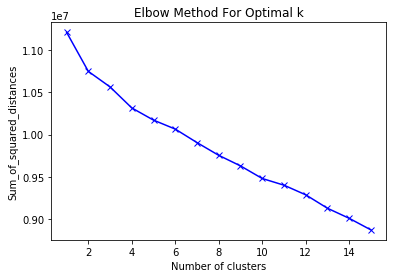

In [68]:
plt.plot(range(1 ,16), sse, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [69]:
# Try 3 clusters 

km = KMeans(n_clusters = 3, random_state = 0, n_jobs = -1)
km.fit(df_scaled)

# Put result to a dataframe
df_result = pd.DataFrame(data = scaler.inverse_transform(km.cluster_centers_), columns = df_cust_seg.columns)

In [70]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.options.display.max_rows = 150

df_result.transpose()

,0,1,2
weekly_consumption_hour,26.92454,27.48423,34.76657
age,44.84351,46.72555,46.84918
cancel_before_trial_end,0.92391,0.00014,0.46870
initial_credit_card_declined,0.05788,0.00111,0.03488
join_fee,0.10762,0.11347,0.14871
paid_TF,0.01523,0.99935,0.49474
refund_after_trial_TF,0.00024,0.07643,0.03629
latest_eng_record_period,0.00006,1.21244,0.55236
Churn,1.00000,0.46461,0.69736
package_type_base,0.46753,0.48940,0.44750


In [71]:
# Obtain the cluster result

df_cluster = pd.DataFrame(index = df_cust_seg.index, data = km.predict(df_scaled), columns = ['Cluster'])

df_cluster['Cluster'].replace({0:'Cancel_in_Trial', 1: 'Paid_User', 2: 'Male'}, inplace = True)

df_cluster['Cluster'].value_counts()

Cancel_in_Trial    71377
Paid_User          49394
Male               14248
Name: Cluster, dtype: int64

In [72]:
# Combine the clusting result with orinigal dataframe
df_model_with_cluster = df_model.merge(df_cluster, left_index = True, right_index = True)

In [73]:
# Check the average of each feature for these 3 clusters 
df_model_with_cluster.groupby(by = ['Cluster']).mean().transpose()

Cluster,Cancel_in_Trial,Male,Paid_User
weekly_consumption_hour,26.92461,34.76657,27.48396
retarget_TF,0.03175,0.01460,0.04047
age,44.84319,46.84918,46.72545
discount_price,4.51511,4.51415,4.51313
cancel_before_trial_end,0.92411,0.46870,0.00014
initial_credit_card_declined,0.05789,0.03488,0.00111
revenue_net,0.05884,2.44673,3.87807
join_fee,0.10762,0.14871,0.11348
paid_TF,0.01502,0.49474,0.99935
refund_after_trial_TF,0.00024,0.03629,0.07641


In [75]:
df_model_with_cluster.groupby(by = ['Cluster']).mean().transpose()

Cluster,Cancel_in_Trial,Male,Paid_User
weekly_consumption_hour,26.92461,34.76657,27.48396
retarget_TF,0.03175,0.01460,0.04047
age,44.84319,46.84918,46.72545
discount_price,4.51511,4.51415,4.51313
cancel_before_trial_end,0.92411,0.46870,0.00014
initial_credit_card_declined,0.05789,0.03488,0.00111
revenue_net,0.05884,2.44673,3.87807
join_fee,0.10762,0.14871,0.11348
paid_TF,0.01502,0.49474,0.99935
refund_after_trial_TF,0.00024,0.03629,0.07641


In [76]:
int(df_model.loc[(df_model['male_TF_True'] == 1) & (df_model['latest_eng_record_period'] == 0)].shape[0])/int(df_model.loc[(df_model['male_TF_True']==1)].shape[0])

0.5505373323031537

In [77]:
int(df_model.loc[(df_model['latest_eng_record_period'] == 0)].shape[0])/int(df_model.shape[0])

0.600626578481547

#### Clustering Result

1. Using 3 clusters, there are some interesting clusters exist


2. For people in cluster 'Paid User', they are people who stay with the subscription. Their self-reported intend use of our OTT services are likely to be expand international access/regional access. From the technical analysis, they are more likely from email or email blast. If the cluster result is used other than initial customer acquisition (e.g. target certain customer segment to improve the conversion rate after trial), we will have the engagement information for customers in their trial period. Therefore, these people who last longer also showed a noticable difference in their engagement records. Their daily average number of app opens are likely to be approximitely 2.25 times, and the difference in daily average number of videos completed are also worth noting as they are compelted more than 3.32 videos per day.


3. For people in cluster 'Cancel_After_Trial', they are people who are churned, most of them churned in their tiral period (before trial ends or just after trial ends). They are people who generate almost no revenue for the company. They are tend to be slightly younger than people in other clusters in general. Predictly, they are more possible from facebook. Similarly,if we have the engagement information, we will see these group of people open the app 1.64 times and complete 2.58 videos on average per day. They dont even start that many series per day on average (0.37). But the daily average number of customer service messages are higher than other clusters (0.84)


4. In cluster 'Male', Male customers showed some interesting characteristics. Firstly, even though approximately 55% of them do not pass to the paid period, male in general have a possibility to pass to paid period. Also, they usually have a higher self-reported weekly consumption hour on average, but their daily average number of video completed and number of video watch more than 30 seconds are even slightly lower than churners who never pass their triall period (cluster 'Cancel_After_Trial'). Assuming customers correctly reported their weekly consumption hours, the outcome may due to that there is no interesting content for male customers. But the assumption is a bit extreme as customers self-reported information are usually not rational and reliable.



## Attribution & Allocation

In [78]:
df_ad = pd.read_excel('advertising_spend_data.xlsx', header = 2)

df_ad

,date,facebook,email,search,brand sem intent google,affiliate,email_blast,pinterest,referral
0,2019-06-30,84800,75000,17300,21400,11900,10500,5900,6100
1,2019-07-31,60000,75600,17300,21300,12000,29800,6000,6600
2,2019-08-31,52300,76100,18100,21300,16300,65900,6200,6800
3,2019-09-30,49000,75800,18900,21300,16400,73700,6000,7400
4,2019-10-31,51300,76000,21000,21400,12200,32300,6700,7300
5,2019-11-30,56100,75900,21400,21600,11700,9800,6300,7300
6,2019-12-31,51400,76100,32100,22200,12100,3500,7200,8000
7,2020-01-31,49000,75500,33600,22700,14300,300,6700,7400
8,2020-02-29,49700,76600,30100,21700,15000,300,6400,6500
9,2020-03-31,49100,78000,22700,21200,17600,300,5900,10000


In [79]:
# Since the advertising spend data are monthly data and the months are not overlapping
# Conver the date column to month
df_ad['month'] = df_ad['date'].dt.month

df_ad

,date,facebook,email,search,brand sem intent google,affiliate,email_blast,pinterest,referral,month
0,2019-06-30,84800,75000,17300,21400,11900,10500,5900,6100,6
1,2019-07-31,60000,75600,17300,21300,12000,29800,6000,6600,7
2,2019-08-31,52300,76100,18100,21300,16300,65900,6200,6800,8
3,2019-09-30,49000,75800,18900,21300,16400,73700,6000,7400,9
4,2019-10-31,51300,76000,21000,21400,12200,32300,6700,7300,10
5,2019-11-30,56100,75900,21400,21600,11700,9800,6300,7300,11
6,2019-12-31,51400,76100,32100,22200,12100,3500,7200,8000,12
7,2020-01-31,49000,75500,33600,22700,14300,300,6700,7400,1
8,2020-02-29,49700,76600,30100,21700,15000,300,6400,6500,2
9,2020-03-31,49100,78000,22700,21200,17600,300,5900,10000,3


In [80]:
df_sub_s[['account_creation_date', 'attribution_technical', 'attribution_survey']]['attribution_technical'].value_counts()

facebook                   48056
email                      16147
search                     14544
organic                    13414
brand sem intent google    10897
google_organic              6960
affiliate                   4449
email_blast                 4188
pinterest                   3522
referral                    3424
facebook_organic            1829
brand sem intent bing       1390
discovery                   1271
other                       1204
internal                     797
bing                         636
podcast                      587
display                      541
youtube                      404
bing_organic                 220
vod                          156
ott                           85
direct_mail                   75
samsung                       74
quora                         58
appstore                      26
pinterest_organic             19
criteo                        19
influencer                    15
content_greatist               4
playstore 

In [81]:
# Use account creation date as the date the customer is acquired
# Channel allocation is 50:50 between technical and survey
# Except when the survey is TV, the TV channel will have 100% credit


df_attribution = df_sub_s[['account_creation_date', 'attribution_technical', 'attribution_survey']]

df_attribution['account_creation_month'] = df_attribution['account_creation_date'].dt.month

df_attribution

C:\Users\mabow\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,account_creation_date,attribution_technical,attribution_survey,account_creation_month
496617,2019-12-07 16:37:06,organic,facebook,12
192823,2020-02-19 18:30:15,bing,search,2
315863,2020-03-05 14:52:22,email,referral,3
254782,2020-02-23 17:50:25,facebook,facebook,2
290426,2019-12-01 07:29:14,search,search,12
...,...,...,...,...
230734,2020-01-14 02:04:52,facebook,facebook,1
577745,2020-03-06 02:57:03,affiliate,facebook,3
603751,2020-01-01 22:43:56,email,pinterest,1
509326,2019-11-17 14:12:33,facebook,facebook_organic,11


In [82]:
df_attribution.isna().sum()

account_creation_date        0
attribution_technical        0
attribution_survey        1592
account_creation_month       0
dtype: int64

In [83]:
# Fill missing information in attribution_survey as other

df_attribution['attribution_survey'].fillna('other', inplace = True)

C:\Users\mabow\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [84]:
# Initial template creation


attr_temp = list(set(df_attribution['attribution_technical'].tolist()))

print(len(attr_temp))

for i in set(df_attribution['attribution_survey'].tolist()):
    if (not i in attr_temp):
        print(i)
        attr_temp.append(i)
        
print(len(attr_temp))

33
sirius xm
amfm_radio
social_organic
public_radio
37


In [85]:
attr_temp_d = {}

for i in attr_temp:
    attr_temp_d[i] = 0
    
attr_temp_d

{'bing_organic': 0,
 'referral': 0,
 'google_organic': 0,
 'quora': 0,
 'organic': 0,
 'tv': 0,
 'playstore': 0,
 'other': 0,
 'display': 0,
 'facebook': 0,
 'pinterest_organic': 0,
 'bing': 0,
 'discovery': 0,
 'internal': 0,
 'direct_mail': 0,
 'influencer': 0,
 'affiliate': 0,
 'content_greatist': 0,
 'samsung': 0,
 'email_blast': 0,
 'brand sem intent bing': 0,
 'pinterest': 0,
 'vod': 0,
 'podcast': 0,
 'criteo': 0,
 'facebook_organic': 0,
 'twitter': 0,
 'search': 0,
 'appstore': 0,
 'brand sem intent google': 0,
 'ott': 0,
 'email': 0,
 'youtube': 0,
 'sirius xm': 0,
 'amfm_radio': 0,
 'social_organic': 0,
 'public_radio': 0}

In [86]:
# Initial template creation - con't

attr_d = {}

for m in set(df_attribution['account_creation_month'].tolist()):
    attr_d[m] = attr_temp_d.copy()



In [87]:
df_attribution

,account_creation_date,attribution_technical,attribution_survey,account_creation_month
496617,2019-12-07 16:37:06,organic,facebook,12
192823,2020-02-19 18:30:15,bing,search,2
315863,2020-03-05 14:52:22,email,referral,3
254782,2020-02-23 17:50:25,facebook,facebook,2
290426,2019-12-01 07:29:14,search,search,12
...,...,...,...,...
230734,2020-01-14 02:04:52,facebook,facebook,1
577745,2020-03-06 02:57:03,affiliate,facebook,3
603751,2020-01-01 22:43:56,email,pinterest,1
509326,2019-11-17 14:12:33,facebook,facebook_organic,11


In [88]:
# Allocation process 


for row in df_attribution.itertuples():
    
    month = int(row[4])
    tech = row[2]
    survey = row[3]
    
    
    if survey != 'tv':
        attr_d[month][tech] += 0.5
        attr_d[month][survey] += 0.5
    else:
        attr_d[month][survey] += 1
    

In [89]:
attr_d

{1: {'bing_organic': 4.0,
  'referral': 624.5,
  'google_organic': 145.0,
  'quora': 0,
  'organic': 338.5,
  'tv': 2055,
  'playstore': 0.5,
  'other': 204.5,
  'display': 68.5,
  'facebook': 2899.0,
  'pinterest_organic': 0.5,
  'bing': 17.5,
  'discovery': 31.0,
  'internal': 9.5,
  'direct_mail': 25.0,
  'influencer': 0.5,
  'affiliate': 174.5,
  'content_greatist': 0.5,
  'samsung': 0,
  'email_blast': 8.5,
  'brand sem intent bing': 35.5,
  'pinterest': 314.0,
  'vod': 2.0,
  'podcast': 145.0,
  'criteo': 0,
  'facebook_organic': 71.0,
  'twitter': 0,
  'search': 707.0,
  'appstore': 1.5,
  'brand sem intent google': 303.0,
  'ott': 41.0,
  'email': 354.5,
  'youtube': 162.5,
  'sirius xm': 31.0,
  'amfm_radio': 14.0,
  'social_organic': 73.5,
  'public_radio': 112.5},
 2: {'bing_organic': 4.5,
  'referral': 1149.0,
  'google_organic': 380.5,
  'quora': 0,
  'organic': 652.5,
  'tv': 4141,
  'playstore': 0.5,
  'other': 353.0,
  'display': 40.0,
  'facebook': 6140.0,
  'pinterest

In [90]:
# Put result in a dataframe

df_allo = pd.DataFrame(attr_d).transpose()

df_allo

,bing_organic,referral,google_organic,quora,organic,tv,playstore,other,display,facebook,...,search,appstore,brand sem intent google,ott,email,youtube,sirius xm,amfm_radio,social_organic,public_radio
1,4.00000,624.50000,145.00000,0.00000,338.50000,2055.00000,0.50000,204.50000,68.50000,2899.00000,...,707.00000,1.50000,303.00000,41.00000,354.50000,162.50000,31.00000,14.00000,73.50000,112.50000
2,4.50000,1149.00000,380.50000,0.00000,652.50000,4141.00000,0.50000,353.00000,40.00000,6140.00000,...,1372.50000,1.00000,469.00000,185.00000,766.50000,190.50000,60.00000,38.00000,136.00000,194.50000
3,19.50000,1241.50000,537.00000,0.00000,895.50000,4708.00000,1.00000,601.00000,32.00000,6248.50000,...,1208.50000,7.00000,382.00000,194.00000,1003.50000,199.50000,56.50000,39.50000,140.50000,167.50000
6,0.00000,59.00000,29.50000,0.00000,40.50000,515.00000,0.00000,42.00000,0.50000,1096.00000,...,49.00000,0.00000,41.50000,0.00000,101.50000,1.00000,0.00000,0.00000,17.00000,3.00000
7,9.00000,1024.50000,372.00000,0.00000,553.00000,4407.00000,0.00000,466.00000,10.50000,9520.50000,...,593.50000,0.00000,523.00000,0.00000,1105.50000,32.00000,0.50000,0.00000,157.00000,203.50000
8,8.00000,635.50000,153.50000,0.00000,288.50000,1435.00000,0.00000,279.00000,12.00000,5953.50000,...,568.00000,0.00000,345.50000,0.00000,710.50000,43.00000,21.00000,0.00000,109.50000,187.00000
9,8.50000,858.50000,196.50000,20.50000,339.50000,1326.00000,0.00000,273.50000,2.50000,5199.00000,...,675.50000,0.00000,376.50000,0.00000,626.50000,53.00000,33.00000,0.00000,105.50000,228.00000
10,3.00000,665.50000,214.50000,2.00000,300.00000,881.00000,0.00000,209.50000,10.00000,5125.50000,...,676.00000,0.00000,326.00000,0.50000,517.00000,52.50000,32.00000,0.00000,107.00000,220.50000
11,9.00000,1104.50000,307.50000,4.00000,504.00000,1629.00000,0.00000,363.00000,22.00000,10145.50000,...,1064.50000,0.00000,647.50000,38.00000,847.50000,106.00000,41.50000,0.00000,159.50000,297.50000
12,5.50000,865.00000,189.50000,0.00000,383.00000,2123.00000,0.00000,250.00000,21.50000,5794.00000,...,989.50000,0.50000,429.50000,35.50000,651.00000,78.50000,24.50000,0.00000,111.00000,204.00000


In [91]:
channel = df_ad.columns.tolist()

channel.remove('date')
channel.remove('month')

df_allo[channel].sum(axis = 1)

1     5385.00000
2    10800.00000
3    10992.00000
6     1457.50000
7    14322.00000
8     9071.00000
9     8821.00000
10    7987.00000
11   14672.50000
12    9389.00000
dtype: float64

In [92]:
df_attribution.groupby('account_creation_month').count()

,account_creation_date,attribution_technical,attribution_survey
account_creation_month,,,
1,8975,8975,8975
2,17824,17824,17824
3,19135,19135,19135
6,2134,2134,2134
7,20915,20915,20915
8,11851,11851,11851
9,11931,11931,11931
10,10331,10331,10331
11,18763,18763,18763


Given the limited information of advertising spending, this analysis dropped out around 4,000 customers per month -> total of 48,000 customers

In [93]:
df_allo_s = df_allo[channel].reset_index()

df_allo_s.rename({'index': 'month'}, axis = 1, inplace = True)

df_allo_s

,month,facebook,email,search,brand sem intent google,affiliate,email_blast,pinterest,referral
0,1,2899.00000,354.50000,707.00000,303.00000,174.50000,8.50000,314.00000,624.50000
1,2,6140.00000,766.50000,1372.50000,469.00000,391.50000,23.00000,488.50000,1149.00000
2,3,6248.50000,1003.50000,1208.50000,382.00000,461.00000,17.00000,430.00000,1241.50000
3,6,1096.00000,101.50000,49.00000,41.50000,30.50000,38.00000,42.00000,59.00000
4,7,9520.50000,1105.50000,593.50000,523.00000,310.50000,538.50000,706.00000,1024.50000
5,8,5953.50000,710.50000,568.00000,345.50000,306.00000,204.50000,347.50000,635.50000
6,9,5199.00000,626.50000,675.50000,376.50000,248.50000,460.00000,376.50000,858.50000
7,10,5125.50000,517.00000,676.00000,326.00000,108.00000,216.50000,352.50000,665.50000
8,11,10145.50000,847.50000,1064.50000,647.50000,173.00000,210.00000,480.00000,1104.50000
9,12,5794.00000,651.00000,989.50000,429.50000,143.50000,86.00000,430.50000,865.00000


In [94]:
# Calculate monthly CAC

CAC = []

for m in df_allo_s['month'].tolist():
    
    temp_d = {'month':m}
    
    for c in channel:
        n = int(df_allo_s.loc[(df_allo_s['month'] == m)][c])
        cost = int(df_ad.loc[(df_ad['month'] == m)][c])
        m_cac = cost/n
        temp_d[c] = m_cac
    
    CAC.append(temp_d)

In [95]:
CAC

[{'month': 1,
  'facebook': 16.90238013107968,
  'email': 213.27683615819208,
  'search': 47.524752475247524,
  'brand sem intent google': 74.91749174917491,
  'affiliate': 82.183908045977,
  'email_blast': 37.5,
  'pinterest': 21.337579617834393,
  'referral': 11.85897435897436},
 {'month': 2,
  'facebook': 8.094462540716613,
  'email': 100.0,
  'search': 21.93877551020408,
  'brand sem intent google': 46.26865671641791,
  'affiliate': 38.36317135549872,
  'email_blast': 13.043478260869565,
  'pinterest': 13.114754098360656,
  'referral': 5.657093124456049},
 {'month': 3,
  'facebook': 7.858514724711908,
  'email': 77.7666999002991,
  'search': 18.79139072847682,
  'brand sem intent google': 55.49738219895288,
  'affiliate': 38.17787418655097,
  'email_blast': 17.647058823529413,
  'pinterest': 13.720930232558139,
  'referral': 8.058017727639001},
 {'month': 6,
  'facebook': 77.37226277372262,
  'email': 742.5742574257425,
  'search': 353.0612244897959,
  'brand sem intent google': 52

In [111]:
df_CAC = pd.DataFrame(CAC)
df_CAC

,month,facebook,email,search,brand sem intent google,affiliate,email_blast,pinterest,referral
0,1,16.90238,213.27684,47.52475,74.91749,82.18391,37.50000,21.33758,11.85897
1,2,8.09446,100.00000,21.93878,46.26866,38.36317,13.04348,13.11475,5.65709
2,3,7.85851,77.76670,18.79139,55.49738,38.17787,17.64706,13.72093,8.05802
3,6,77.37226,742.57426,353.06122,521.95122,396.66667,276.31579,140.47619,103.38983
4,7,6.30252,68.41629,29.17369,40.72658,38.70968,55.39033,8.49858,6.44531
5,8,8.78549,107.18310,31.86620,61.73913,53.26797,323.03922,17.86744,10.70866
6,9,9.42489,121.08626,28.00000,56.64894,66.12903,160.21739,15.95745,8.62471
7,10,10.00976,147.00193,31.06509,65.64417,112.96296,149.53704,19.03409,10.97744
8,11,5.52982,89.61039,20.11278,33.38485,67.63006,46.66667,13.12500,6.61232
9,12,8.87125,116.89708,32.45703,51.74825,84.61538,40.69767,16.74419,9.24855


In [112]:
# Bring back the actual advertising spending date for plot

df_CAC = df_CAC.merge(df_ad['date'], left_on = df_CAC['month'], right_on = df_ad['date'].dt.month)

df_CAC.drop(['key_0', 'month'],axis = 1, inplace = True)
df_CAC

,facebook,email,search,brand sem intent google,affiliate,email_blast,pinterest,referral,date
0,16.90238,213.27684,47.52475,74.91749,82.18391,37.50000,21.33758,11.85897,2020-01-31
1,8.09446,100.00000,21.93878,46.26866,38.36317,13.04348,13.11475,5.65709,2020-02-29
2,7.85851,77.76670,18.79139,55.49738,38.17787,17.64706,13.72093,8.05802,2020-03-31
3,77.37226,742.57426,353.06122,521.95122,396.66667,276.31579,140.47619,103.38983,2019-06-30
4,6.30252,68.41629,29.17369,40.72658,38.70968,55.39033,8.49858,6.44531,2019-07-31
5,8.78549,107.18310,31.86620,61.73913,53.26797,323.03922,17.86744,10.70866,2019-08-31
6,9.42489,121.08626,28.00000,56.64894,66.12903,160.21739,15.95745,8.62471,2019-09-30
7,10.00976,147.00193,31.06509,65.64417,112.96296,149.53704,19.03409,10.97744,2019-10-31
8,5.52982,89.61039,20.11278,33.38485,67.63006,46.66667,13.12500,6.61232,2019-11-30
9,8.87125,116.89708,32.45703,51.74825,84.61538,40.69767,16.74419,9.24855,2019-12-31


In [113]:
pd.Timestamp(2020,1,1)

Timestamp('2020-01-01 00:00:00')

In [116]:
# convert date to the beginning of the month for plot purpose

def Month_begin(date):
    year = date.year
    month = date.month
    
    day = 1
    
    return (pd.Timestamp(year, month, 1))


df_CAC['begin'] = df_CAC.apply(lambda x: Month_begin(x['date']), axis = 1)

df_CAC

,facebook,email,search,brand sem intent google,affiliate,email_blast,pinterest,referral,date,begin
0,16.90238,213.27684,47.52475,74.91749,82.18391,37.50000,21.33758,11.85897,2020-01-31,2020-01-01
1,8.09446,100.00000,21.93878,46.26866,38.36317,13.04348,13.11475,5.65709,2020-02-29,2020-02-01
2,7.85851,77.76670,18.79139,55.49738,38.17787,17.64706,13.72093,8.05802,2020-03-31,2020-03-01
3,77.37226,742.57426,353.06122,521.95122,396.66667,276.31579,140.47619,103.38983,2019-06-30,2019-06-01
4,6.30252,68.41629,29.17369,40.72658,38.70968,55.39033,8.49858,6.44531,2019-07-31,2019-07-01
5,8.78549,107.18310,31.86620,61.73913,53.26797,323.03922,17.86744,10.70866,2019-08-31,2019-08-01
6,9.42489,121.08626,28.00000,56.64894,66.12903,160.21739,15.95745,8.62471,2019-09-30,2019-09-01
7,10.00976,147.00193,31.06509,65.64417,112.96296,149.53704,19.03409,10.97744,2019-10-31,2019-10-01
8,5.52982,89.61039,20.11278,33.38485,67.63006,46.66667,13.12500,6.61232,2019-11-30,2019-11-01
9,8.87125,116.89708,32.45703,51.74825,84.61538,40.69767,16.74419,9.24855,2019-12-31,2019-12-01


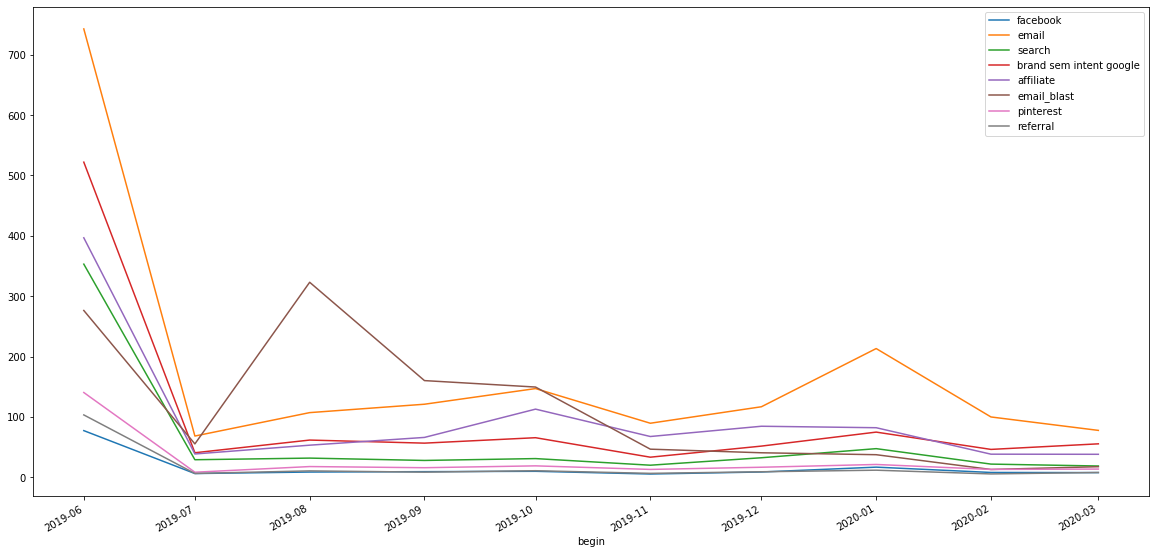

In [117]:
df_CAC.loc[:, ~df_CAC.columns.str.contains('date')].plot.line(x = 'begin', figsize = (20,10))



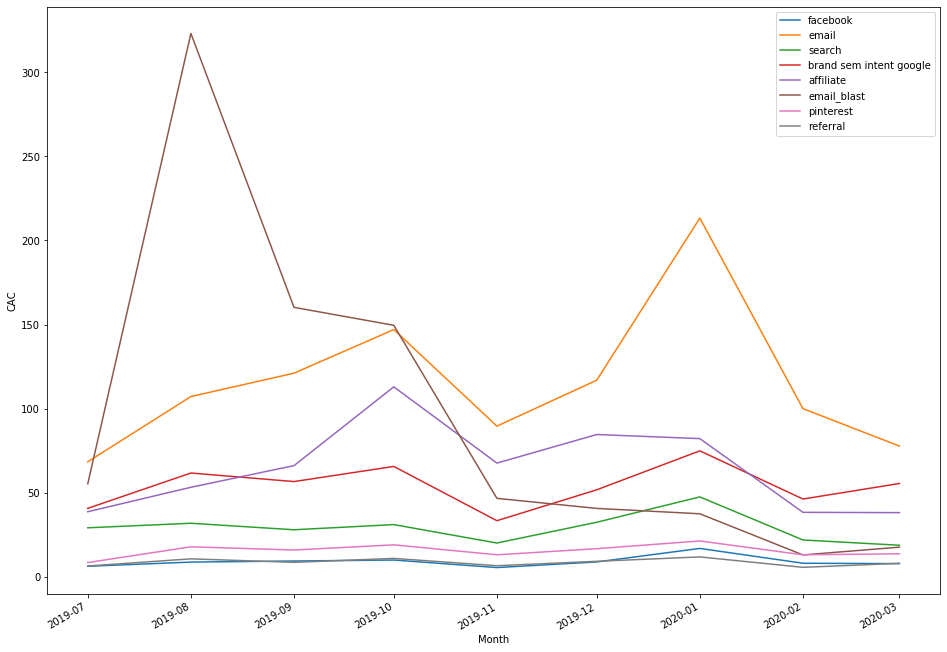

In [123]:
# if we drop month 6 to remove the outliers

df_CAC.loc[:, ~df_CAC.columns.str.contains('date')][df_CAC['begin'] != pd.Timestamp(2019,6,1)].plot.line(x = 'begin', figsize = (16,12))

plt.xlabel('Month')

plt.ylabel('CAC')


# Save figure

plt.savefig('CAC.png')

### Allocation Result

1. Email related advertising usually have a higher CAC
2. Referral, facebook, and pinterest are usually the cheap option
3. Email blast showed a decreasing CAC overtime -- may due to the better customer targeting algorithms or the improved popularity of the company

## Churn Modeling

The goal of churn modeling is to predict whether a customer who passed his or her trial period (currently in the first paid period) will churn in the next period

In [124]:
df_model_churn = df_model.loc[(df_model['latest_eng_record_period'] != 0) & (df_model['max_period'] == 2)]

df_model_churn

,weekly_consumption_hour,retarget_TF,age,discount_price,cancel_before_trial_end,initial_credit_card_declined,revenue_net,join_fee,paid_TF,refund_after_trial_TF,...,delta_to_previous_daily_num_videos_more_than_30_seconds_period_1,delta_to_previous_daily_num_videos_more_than_30_seconds_period_2,delta_to_previous_daily_num_videos_more_than_30_seconds_period_3,delta_to_previous_daily_num_videos_rated_period_1,delta_to_previous_daily_num_videos_rated_period_2,delta_to_previous_daily_num_videos_rated_period_3,delta_to_previous_daily_num_series_started_period_1,delta_to_previous_daily_num_series_started_period_2,delta_to_previous_daily_num_series_started_period_3,revenue_net_1month
subid,,,,,,,,,,,,,,,,,,,,,
21511732,27.30145,True,26.00000,4.51410,False,False,3.22960,0.03670,True,False,...,1.13333,0.00000,0.00000,0.00000,0.00000,0.00000,0.46667,0.00000,0.00000,3.22960
21639671,27.95677,True,45.74346,4.51410,False,False,1.70802,0.11410,True,False,...,-1.45000,0.00000,0.00000,0.00000,0.00000,0.00000,-0.27500,0.00000,0.00000,4.58750
25100145,27.30145,False,60.00000,4.51410,False,False,4.58750,0.03670,True,False,...,-0.57419,0.00000,0.00000,0.00000,0.00000,0.00000,0.03441,0.00000,0.00000,4.58750
27955482,27.95677,False,45.74346,4.51410,False,False,1.70802,0.11410,True,False,...,-2.82773,0.00000,0.00000,0.00000,0.00000,0.00000,-0.64286,0.00000,0.00000,5.06460
28506369,30.20136,False,46.00000,4.51410,False,False,10.01910,0.03670,True,False,...,-0.62035,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,5.02790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25749000,30.20136,False,67.00000,4.51410,False,False,7.34000,0.03670,True,False,...,-1.12688,-1.33978,0.00000,0.00000,0.00000,0.00000,-0.38065,0.21398,0.00000,3.67000
27161457,27.95677,False,45.74346,4.51410,False,False,1.70802,0.11410,True,False,...,0.54762,0.00000,0.00000,0.00000,0.00000,0.00000,0.42857,0.00000,0.00000,4.58750
24315621,27.95677,False,45.74346,4.51410,False,False,1.70802,0.11410,True,False,...,-0.57419,0.00000,0.00000,0.19140,0.00000,0.00000,0.00000,0.00000,0.00000,4.58750


In [125]:
# Check missing value
df_model_churn.isna().sum()

weekly_consumption_hour                                             0
retarget_TF                                                         0
age                                                                 0
discount_price                                                      0
cancel_before_trial_end                                             0
initial_credit_card_declined                                        0
revenue_net                                                         0
join_fee                                                            0
paid_TF                                                             0
refund_after_trial_TF                                               0
max_period                                                          0
latest_eng_record_period                                            0
Churn                                                               0
package_type_base                                                   0
package_type_economy

In [126]:
# Check label distribution

df_model_churn['Churn'].value_counts()

# no need to resample

True     14636
False     8216
Name: Churn, dtype: int64

In [127]:
# select features to use for prediction model

var = df_model_churn.columns.tolist()



# These features are also be removed
var_remove = ['retarget_TF', 'cancel_before_trial_end', 'revenue_net', 
              'refund_after_trial_TF', 'latest_eng_record_period', 'Churn',
             'revenue_net_1month']

# In real life situation, there is no engagement information after period 1 
for col in var:
    if ('period_2' in col) or ('period_3' in col):
        var_remove.append(col)

for i in var_remove:
    var.remove(i)



In [128]:
# Check Correlation
df_model_churn[var + ['Churn']].corr()['Churn']

weekly_consumption_hour                                            -0.01322
age                                                                -0.08033
discount_price                                                      0.00983
initial_credit_card_declined                                        0.02849
join_fee                                                            0.03641
paid_TF                                                                 nan
max_period                                                              nan
package_type_base                                                  -0.02772
package_type_economy                                               -0.03921
package_type_enhanced                                               0.05438
preferred_genre_comedy                                              0.01213
preferred_genre_drama                                              -0.00799
preferred_genre_international                                      -0.01641
preferred_ge

In [129]:
dfX = df_model_churn[var]
dfY = df_model_churn['Churn']

# split train_test dataset, test set is 40%

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(dfX, dfY, test_size=0.40, stratify = dfY, random_state = 0)


# Standarize the datasets of independent variables 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [130]:
# Check train_test set label distribution
print('Num of Churn -- Train set = {}'.format(Y_train.sum()))
print('Num of Non_Churn -- Train set = {}'.format(len(Y_train) - Y_train.sum()))

print('Num of Churn -- Test set = {}'.format(Y_test.sum()))
print('Num of Non_Churn -- Test set = {}'.format(len(Y_test) - Y_test.sum()))

Num of Churn -- Train set = 8781
Num of Non_Churn -- Train set = 4930
Num of Churn -- Test set = 5855
Num of Non_Churn -- Test set = 3286


In [136]:
# Create dummy classifier for future model evalaution

from sklearn.dummy import DummyClassifier

dm_clf = DummyClassifier(strategy="most_frequent")
dm_clf.fit(X_train_scaled, Y_train)

y_pred = dm_clf.predict(X_test_scaled)

from sklearn import metrics

print('Accuracy = {}'.format(round(metrics.accuracy_score(Y_test, y_pred),4)))
print('Blanced Accuracy = {}'.format(round(metrics.balanced_accuracy_score(Y_test, y_pred),4)))

print(metrics.classification_report(Y_test, y_pred))

Accuracy = 0.6405
Blanced Accuracy = 0.5
              precision    recall  f1-score   support

       False       0.00      0.00      0.00      3286
        True       0.64      1.00      0.78      5855

    accuracy                           0.64      9141
   macro avg       0.32      0.50      0.39      9141
weighted avg       0.41      0.64      0.50      9141



In [137]:
dm_clf.score(X_train_scaled, Y_train)

0.6404346874772081

In [138]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

params = {'C': [0.001, 0.01, 0.1, 1, 10]}

LRclf = LogisticRegression(max_iter = 500)

clf = GridSearchCV(estimator = LRclf, param_grid = params, cv = 5, n_jobs = -1)

clf.fit(X_train_scaled, Y_train)

print('Accuracy = {}'.format(round(clf.score(X_test_scaled, Y_test), 4)))

Accuracy = 0.6677


In [139]:
clf.best_params_

{'C': 10}

In [140]:
LRclf = clf.best_estimator_

co = LRclf.coef_.tolist()
co = co[0]
LR_d = {}
for name,coef in zip(var, co):
    LR_d[name] = coef
pd.DataFrame.from_dict(LR_d, orient = 'index', columns = ['Coef']).sort_values(by = 'Coef',ascending = False)

,Coef
daily_cust_service_mssgs_period_1,2.74870
daily_app_opens_period_1,2.06605
daily_num_videos_completed_period_1,0.83453
daily_num_videos_more_than_30_seconds_period_1,0.68051
initial_credit_card_declined,0.33443
attribution_technical_content_greatist,0.07442
join_fee,0.07071
attribution_technical_criteo,0.07030
discount_price,0.06540
attribution_technical_pinterest_organic,0.05923


In [141]:
# Try remove the time variable

var2 = var.copy()

var2.remove('max_period')


# Redefine X and Y
dfX = df_model_churn[var2]
dfY = df_model_churn['Churn']

# split train_test dataset, test set is 40%

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(dfX, dfY, test_size=0.40, stratify = dfY, random_state = 0)


# Standarize the datasets of independent variables 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [142]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

params = {'C': [0.001, 0.01, 0.1, 1, 10]}

LRclf = LogisticRegression(max_iter = 500)

clf = GridSearchCV(estimator = LRclf, param_grid = params, cv = 5, n_jobs = -1)

clf.fit(X_train_scaled, Y_train)

print('Accuracy = {}'.format(round(clf.score(X_test_scaled, Y_test), 4)))

Accuracy = 0.6677


In [143]:
clf.score(X_train_scaled, Y_train)

0.6730362482678142

In [144]:
clf.best_params_

{'C': 10}

In [145]:
LRclf = clf.best_estimator_

co = LRclf.coef_.tolist()
co = co[0]
LR_d = {}
for name,coef in zip(var, co):
    LR_d[name] = coef
df_LR_coef = pd.DataFrame.from_dict(LR_d, orient = 'index', columns = ['Coef']).sort_values(by = 'Coef',ascending = False)

df_LR_coef

,Coef
daily_cust_service_mssgs_period_0,2.54008
daily_app_opens_period_0,2.10171
daily_num_videos_completed_period_0,0.83775
daily_num_videos_more_than_30_seconds_period_0,0.68037
initial_credit_card_declined,0.32647
attribution_technical_brand sem intent google,0.07230
join_fee,0.07071
attribution_technical_content_greatist,0.06765
discount_price,0.06556
attribution_technical_pinterest,0.05969


In [146]:
# Cross validation score

from sklearn.model_selection import cross_val_score

score = cross_val_score(LRclf, dfX, dfY, cv=5, scoring = 'roc_auc')
print(score)
print(score.mean())
print(score.std())

C:\Users\mabow\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\mabow\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

[0.70839154 0.6919664  0.69459527 0.69425944 0.69709638]
0.6972618033774223
0.005797659320140118


C:\Users\mabow\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


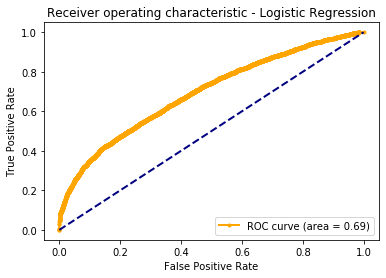

In [147]:
# plot ROC curve

y_pred_prob = LRclf.predict_proba(X_test_scaled)[:,1].tolist()

fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred_prob)


plt.plot(fpr, tpr, marker='.', color = 'orange', lw=2, label='ROC curve (area = %0.2f)' % metrics.roc_auc_score(Y_test, y_pred_prob))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('Receiver operating characteristic - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

In [148]:
# Select important feature from LR model

from sklearn.feature_selection import SelectFromModel
model = SelectFromModel(LRclf, prefit = True)
dfX.columns[model.get_support()]

Index(['initial_credit_card_declined', 'daily_app_opens_period_0',
       'daily_app_opens_period_1', 'daily_cust_service_mssgs_period_0',
       'daily_cust_service_mssgs_period_1',
       'daily_num_videos_completed_period_0',
       'daily_num_videos_completed_period_1',
       'daily_num_videos_more_than_30_seconds_period_0',
       'daily_num_videos_more_than_30_seconds_period_1',
       'daily_num_series_started_period_0',
       'delta_to_previous_daily_app_opens_period_1',
       'delta_to_previous_daily_cust_service_mssgs_period_1',
       'delta_to_previous_daily_num_videos_completed_period_1',
       'delta_to_previous_daily_num_videos_more_than_30_seconds_period_1',
       'delta_to_previous_daily_num_series_started_period_1'],
      dtype='object')

In [149]:
LR_imp_feature = list(dfX.columns[model.get_support()])

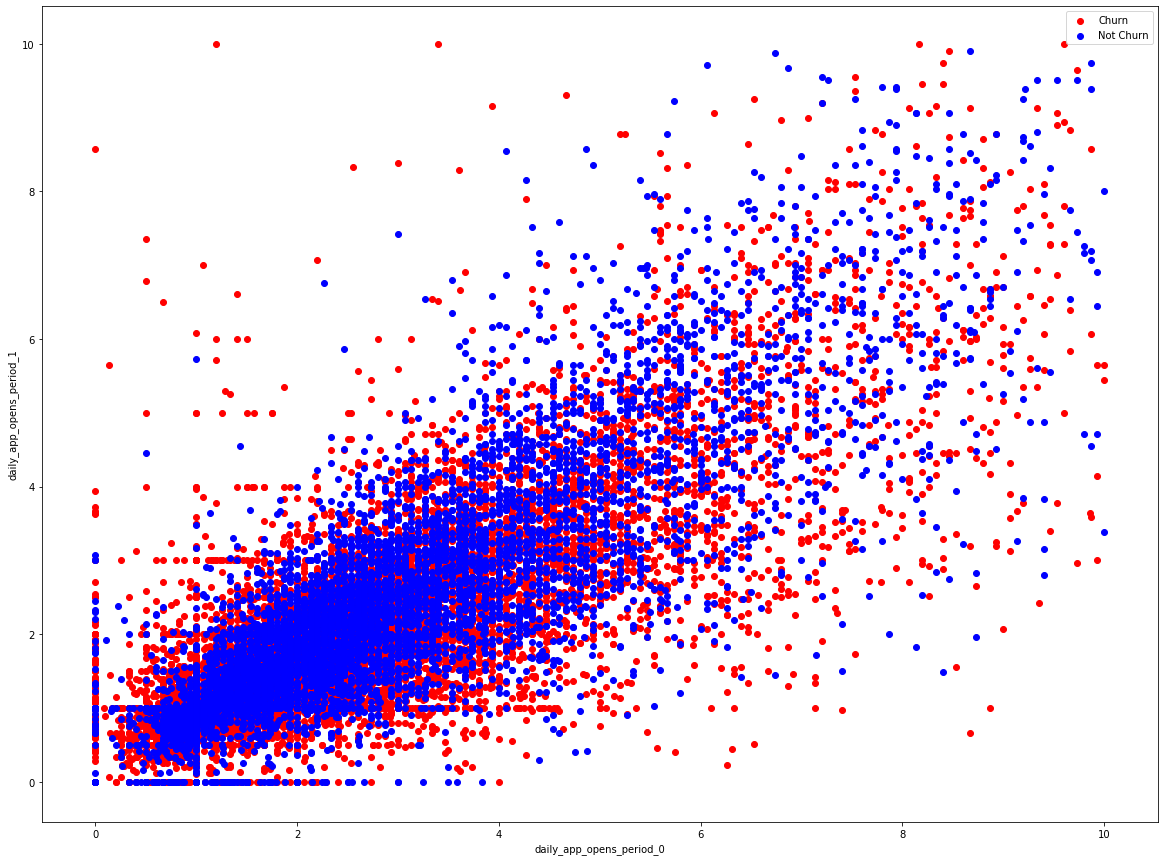

In [150]:
# Check scatter plot to see whether there is noticable difference

# Remove outliers
df_sca = df_model_churn.loc[(df_model_churn['daily_app_opens_period_0'] <= 10) & (df_model_churn['daily_app_opens_period_1'] <= 10)]


# Plot
plt.figure(figsize=(20, 15))

pt_churn = plt.scatter(df_sca.loc[(df_sca['Churn'])]['daily_app_opens_period_0'], 
            df_sca.loc[df_sca['Churn']]['daily_app_opens_period_1'], color = 'r')

pt_Nonchurn = plt.scatter(df_sca.loc[~df_sca['Churn']]['daily_app_opens_period_0'], 
        df_sca.loc[~df_sca['Churn']]['daily_app_opens_period_1'], color = 'b')

plt.legend((pt_churn, pt_Nonchurn), ('Churn', 'Not Churn'))

plt.xlabel('daily_app_opens_period_0')
plt.ylabel('daily_app_opens_period_1')



plt.show()



### Decision Tree

Scaler will not be used as performances of tree structured models will not be influenced by the differences of ranges of continuous variables

In [154]:
from sklearn.tree import DecisionTreeClassifier

dfX = df_model_churn[var2]
dfY = df_model_churn['Churn']

# split train_test dataset, test set is 40%

X_train, X_test, Y_train, Y_test = train_test_split(dfX, dfY, test_size=0.40, stratify = dfY, random_state = 0)


params = {'max_depth': list(range(1, 4, 1))}

DTclf = DecisionTreeClassifier()

clf = GridSearchCV(estimator = DTclf, param_grid = params, cv = 5, n_jobs = -1)

clf.fit(X_train, Y_train)

clf.score(X_test, Y_test)

0.6535390001093973

In [155]:
# Check training accuracy to avoid over-fitting or under-fitting
print(clf.score(X_train, Y_train))

0.6603457078258332


In [156]:
clf.best_params_

{'max_depth': 3}

In [157]:
# obtain the model
DTclf = clf.best_estimator_

y_pred = DTclf.predict(X_test)

print(metrics.classification_report(Y_test, y_pred))



              precision    recall  f1-score   support

       False       0.58      0.14      0.22      3286
        True       0.66      0.94      0.78      5855

    accuracy                           0.65      9141
   macro avg       0.62      0.54      0.50      9141
weighted avg       0.63      0.65      0.58      9141



In [158]:
# Cross validation score

from sklearn.model_selection import cross_val_score

score = cross_val_score(DTclf, dfX, dfY, cv=5, scoring = 'roc_auc')
print(score)
print('Average = {}'.format(round(score.mean(), 4)))
print('STD = {}'.format(score.std()))

[0.6758648  0.66929188 0.66256718 0.66633736 0.67454374]
Average = 0.6697
STD = 0.004976251533774735


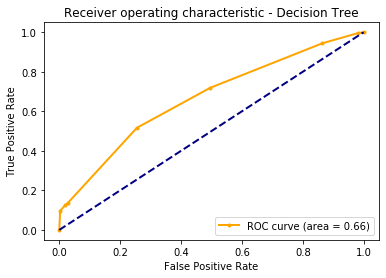

In [159]:
# plot ROC curve

y_pred_prob = DTclf.predict_proba(X_test)[:,1].tolist()

fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred_prob)


plt.plot(fpr, tpr, marker='.', color = 'orange', lw=2, label='ROC curve (area = %0.2f)' % metrics.roc_auc_score(Y_test, y_pred_prob))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('Receiver operating characteristic - Decision Tree')
plt.legend(loc="lower right")
plt.show()

In [160]:
# See feature importance from Decision Tree model
coef = DTclf.feature_importances_

imp = {'Feature':var2, 'Importance':coef}

df_DT_imp = pd.DataFrame(data = imp)

df_DT_imp.sort_values(by = 'Importance', ascending = False)

,Feature,Importance
85,daily_num_series_started_period_1,0.62479
77,daily_cust_service_mssgs_period_1,0.12103
75,daily_app_opens_period_1,0.09695
88,delta_to_previous_daily_num_videos_completed_p...,0.08443
79,daily_num_videos_completed_period_1,0.03955
1,age,0.03325
57,attribution_survey_amfm_radio,0.00000
64,attribution_survey_podcast,0.00000
63,attribution_survey_pinterest,0.00000
62,attribution_survey_ott,0.00000


In [161]:
# Select important feature from Decision Tree model

model = SelectFromModel(DTclf, prefit = True)
dfX.columns[model.get_support()]

Index(['age', 'daily_app_opens_period_1', 'daily_cust_service_mssgs_period_1',
       'daily_num_videos_completed_period_1',
       'daily_num_series_started_period_1',
       'delta_to_previous_daily_num_videos_completed_period_1'],
      dtype='object')

In [162]:
DT_imp_feature = list(dfX.columns[model.get_support()])

In [163]:
# Export Tree

from sklearn import tree
dotfile = open("tree.dot", 'w')
tree.export_graphviz(DTclf, out_file = dotfile, feature_names = dfX.columns, class_names = True, impurity = False, proportion = False)
dotfile.close()

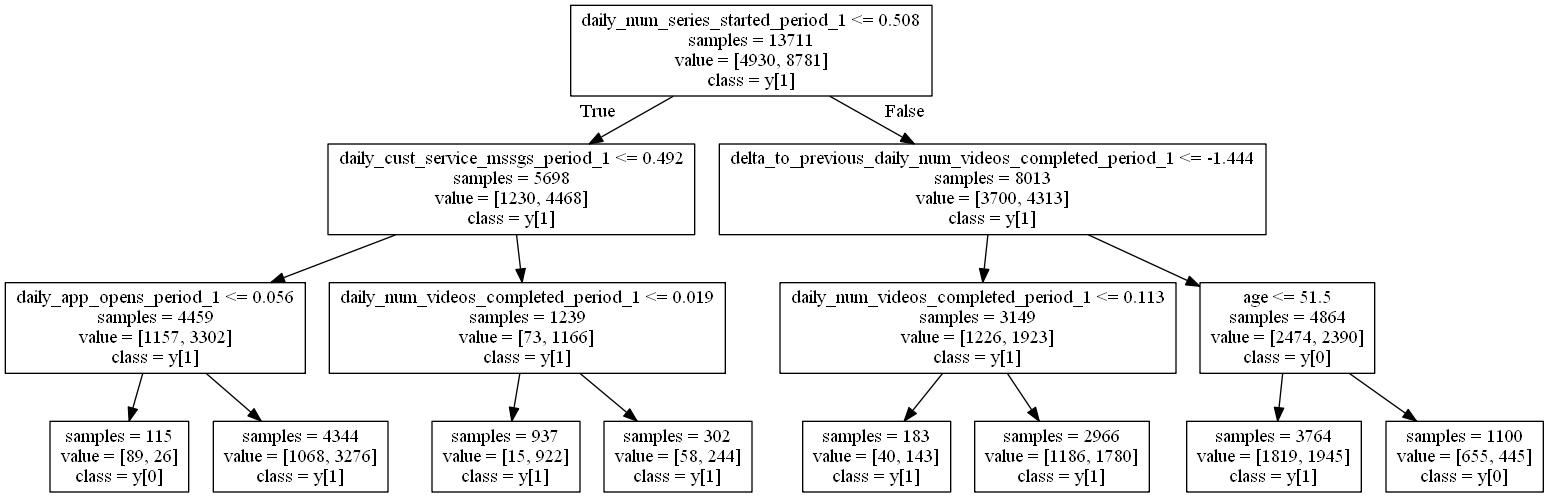

In [165]:
# Save the tree for presentation purpose

from graphviz import Source

graph = Source(tree.export_graphviz(DTclf, out_file = None, feature_names = dfX.columns, class_names = True, impurity = False, proportion = False))
png_bytes = graph.pipe(format='png')
with open('dtree_pipe.png','wb') as f:
    f.write(png_bytes)

from IPython.display import Image
Image(png_bytes)

### GBDT

In [166]:
from sklearn.ensemble import GradientBoostingClassifier

dfX = df_model_churn[var2]
dfY = df_model_churn['Churn']

# split train_test dataset, test set is 40%

X_train, X_test, Y_train, Y_test = train_test_split(dfX, dfY, test_size=0.40, stratify = dfY, random_state = 0)


params = {'n_estimators': list(range(50, 250, 50)), 'max_depth': list(range(1, 4, 1))}

gbdt = GradientBoostingClassifier(verbose = 1)

clf = GridSearchCV(estimator = gbdt, param_grid = params, cv = 5, n_jobs = -1)

clf.fit(X_train, Y_train)

clf.score(X_test, Y_test)

      Iter       Train Loss   Remaining Time 
         1           1.2902            4.61s
         2           1.2769            4.65s
         3           1.2639            4.59s
         4           1.2539            4.59s
         5           1.2442            4.57s
         6           1.2358            4.52s
         7           1.2286            4.50s
         8           1.2227            4.51s
         9           1.2174            4.45s
        10           1.2127            4.43s
        20           1.1840            4.11s
        30           1.1702            3.77s
        40           1.1602            3.45s
        50           1.1540            3.15s
        60           1.1490            2.83s
        70           1.1450            2.52s
        80           1.1421            2.20s
        90           1.1390            1.88s
       100           1.1361            1.57s


0.6706049666338475

In [167]:
# Check training accuracy to avoid over-fitting or under-fitting

print(clf.score(X_train, Y_train))

0.6933848734592662


In [168]:
clf.best_params_

{'max_depth': 2, 'n_estimators': 150}

In [169]:
GBDTclf = clf.best_estimator_

y_pred = GBDTclf.predict(X_test)

print(metrics.classification_report(Y_test, y_pred))



              precision    recall  f1-score   support

       False       0.57      0.33      0.42      3286
        True       0.70      0.86      0.77      5855

    accuracy                           0.67      9141
   macro avg       0.63      0.60      0.60      9141
weighted avg       0.65      0.67      0.64      9141



In [170]:
# Cross validation score

from sklearn.model_selection import cross_val_score

score = cross_val_score(GBDTclf, dfX, dfY, cv=5, scoring = 'roc_auc')
print(score)
print('Average = {}'.format(round(score.mean(), 4)))
print('STD = {}'.format(score.std()))

      Iter       Train Loss   Remaining Time 
         1           1.2913            5.94s
         2           1.2788            5.98s
         3           1.2663            6.11s
         4           1.2559            6.04s
         5           1.2468            5.96s
         6           1.2396            6.01s
         7           1.2330            5.97s
         8           1.2271            5.97s
         9           1.2218            5.95s
        10           1.2173            5.92s
        20           1.1886            5.47s
        30           1.1741            5.06s
        40           1.1665            4.64s
        50           1.1609            4.21s
        60           1.1561            3.77s
        70           1.1519            3.35s
        80           1.1488            2.92s
        90           1.1464            2.50s
       100           1.1437            2.08s
      Iter       Train Loss   Remaining Time 
         1           1.2907            5.94s
        

In [171]:
# Balanced Accuracy

print(metrics.balanced_accuracy_score(Y_test, y_pred))

0.5969241452363961


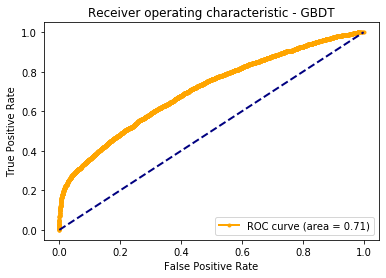

In [172]:
# plot ROC curve

y_pred_prob = GBDTclf.predict_proba(X_test)[:,1].tolist()

fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred_prob)


plt.plot(fpr, tpr, marker='.', color = 'orange', lw=2, label='ROC curve (area = %0.2f)' % metrics.roc_auc_score(Y_test, y_pred_prob))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('Receiver operating characteristic - GBDT')
plt.legend(loc="lower right")
plt.show()

In [173]:
# See feature importance from GBDT model
coef = GBDTclf.feature_importances_

imp = {'Feature':var2, 'Importance':coef}

df_GBDT_imp = pd.DataFrame(data = imp)

df_GBDT_imp.sort_values(by = 'Importance', ascending = False)

,Feature,Importance
85,daily_num_series_started_period_1,0.32008
79,daily_num_videos_completed_period_1,0.16988
77,daily_cust_service_mssgs_period_1,0.08440
75,daily_app_opens_period_1,0.07236
81,daily_num_videos_more_than_30_seconds_period_1,0.06835
88,delta_to_previous_daily_num_videos_completed_p...,0.04990
1,age,0.04747
87,delta_to_previous_daily_cust_service_mssgs_per...,0.02886
86,delta_to_previous_daily_app_opens_period_1,0.02566
89,delta_to_previous_daily_num_videos_more_than_3...,0.01991


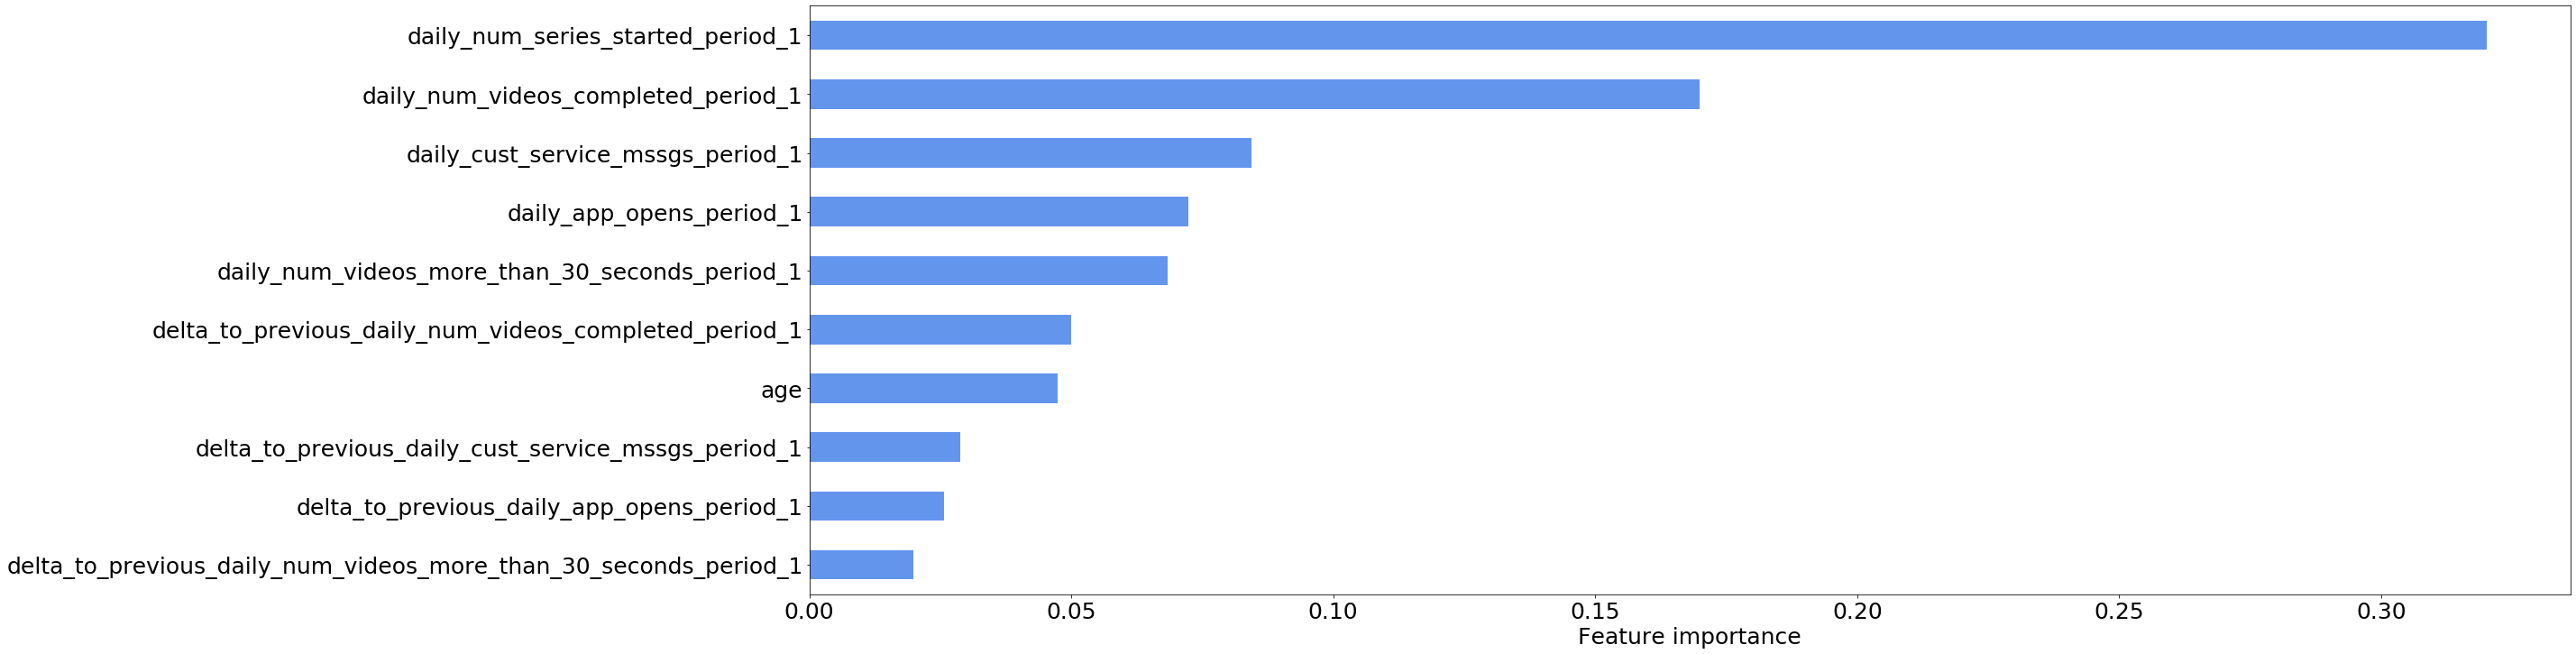

In [196]:
# Plot feature importance
feat_importances = pd.Series(coef, index=dfX.columns)
ax = feat_importances.sort_values(ascending = True)[-10:].plot(kind="barh",color="#6495ED",figsize=(35,12))
plt.xlabel('Feature importance', fontsize = 25)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.savefig('GBDT_feature_imp.png')
plt.show()

In [133]:
# Select important feature from GBDT model

model = SelectFromModel(GBDTclf, prefit = True)
dfX.columns[model.get_support()]

Index(['age', 'daily_app_opens_period_0', 'daily_app_opens_period_1',
       'daily_cust_service_mssgs_period_1',
       'daily_num_videos_completed_period_1',
       'daily_num_videos_more_than_30_seconds_period_1',
       'daily_num_videos_rated_period_1', 'daily_num_series_started_period_0',
       'daily_num_series_started_period_1',
       'delta_to_previous_daily_app_opens_period_1',
       'delta_to_previous_daily_cust_service_mssgs_period_1',
       'delta_to_previous_daily_num_videos_completed_period_1',
       'delta_to_previous_daily_num_videos_more_than_30_seconds_period_1',
       'delta_to_previous_daily_num_videos_rated_period_1'],
      dtype='object')

In [134]:
GBDT_imp_feature = list(dfX.columns[model.get_support()])

In [135]:
# Print features used in LR but not in DT 

for i in LR_imp_feature:
    if not i in DT_imp_feature:
        print(i)

initial_credit_card_declined
daily_app_opens_period_0
daily_cust_service_mssgs_period_0
daily_num_videos_completed_period_0
daily_num_videos_more_than_30_seconds_period_0
daily_num_videos_more_than_30_seconds_period_1
daily_num_series_started_period_0
delta_to_previous_daily_cust_service_mssgs_period_1
delta_to_previous_daily_num_videos_more_than_30_seconds_period_1
delta_to_previous_daily_num_series_started_period_1


In [136]:
# Print features used in LR but not in GBDT 

for i in LR_imp_feature:
    if not i in GBDT_imp_feature:
        print(i)

initial_credit_card_declined
daily_cust_service_mssgs_period_0
daily_num_videos_completed_period_0
daily_num_videos_more_than_30_seconds_period_0
delta_to_previous_daily_num_series_started_period_1


In [137]:
# Print features used in LR but not in GBDT 

for i in GBDT_imp_feature:
    if not i in DT_imp_feature:
        print(i)

daily_app_opens_period_0
daily_num_videos_more_than_30_seconds_period_1
daily_num_videos_rated_period_1
daily_num_series_started_period_0
delta_to_previous_daily_cust_service_mssgs_period_1
delta_to_previous_daily_num_videos_more_than_30_seconds_period_1
delta_to_previous_daily_num_videos_rated_period_1


### Random Forest

In [138]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

dfX = df_model_churn[var2]
dfY = df_model_churn['Churn']

# split train_test dataset, test set is 40%

X_train, X_test, Y_train, Y_test = train_test_split(dfX, dfY, test_size=0.40, stratify = dfY, random_state = 0)


distributions = {'n_estimators': list(range(50, 500, 20)), 'max_depth': list(range(1, 15, 1)), 'max_features': ['auto', 'sqrt'], 'min_samples_leaf': [2, 5, 10, 20]}

rf = RandomForestClassifier(verbose = 1)

clf = RandomizedSearchCV(estimator = rf, param_distributions = distributions, cv = 5, n_jobs = -1, n_iter = 50, return_train_score = True)

clf.fit(X_train, Y_train)

clf.score(X_test, Y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 170 out of 170 | elapsed:    2.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 170 out of 170 | elapsed:    0.1s finished


0.6725741166174379

In [139]:
# Check training accuracy to avoid over-fitting or under-fitting

print(clf.score(X_train, Y_train))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.7509299102910072


[Parallel(n_jobs=1)]: Done 170 out of 170 | elapsed:    0.1s finished


In [140]:
clf.best_params_

{'n_estimators': 170,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10}

In [141]:
clf.cv_results_

{'mean_fit_time': array([ 1.04340401,  7.07608719,  8.97819982,  9.12341247, 10.02958899,
        11.3725997 ,  6.30075755,  6.00813823, 13.59944787, 11.42745261,
        10.62021074,  8.16158285,  2.29426703,  2.14606304, 10.28809838,
         9.90931144,  2.65250869,  2.90343866,  3.92849951,  3.05602989,
         5.92057433,  1.95118656,  3.32431369,  6.95720291,  9.40106888,
         8.81084833,  4.48880162,  9.45392799, 15.94637318,  4.38607569,
         1.13596296,  7.01444988,  3.28700929,  5.13387613,  4.28494515,
         2.47318926,  2.20430746,  4.89291854,  2.73848   ,  4.51253548,
         1.11422062,  3.00018001,  9.35698786,  7.78339362,  6.70288172,
         1.58995275,  3.25370278,  2.4099576 ,  6.11325779,  3.57484341]),
 'std_fit_time': array([0.00783517, 0.02582389, 0.03096231, 0.15249967, 0.05141155,
        0.07611152, 0.048284  , 0.06273364, 0.02830295, 0.06414065,
        0.11603749, 0.04147035, 0.02857787, 0.05438645, 0.04998908,
        0.1036202 , 0.04620393,

In [142]:
RFclf = clf.best_estimator_

y_pred = RFclf.predict(X_test)

print(metrics.classification_report(Y_test, y_pred))



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 170 out of 170 | elapsed:    0.1s finished


              precision    recall  f1-score   support

       False       0.59      0.30      0.40      3286
        True       0.69      0.88      0.77      5855

    accuracy                           0.67      9141
   macro avg       0.64      0.59      0.59      9141
weighted avg       0.65      0.67      0.64      9141



In [143]:
# Cross validation score

from sklearn.model_selection import cross_val_score

score = cross_val_score(RFclf, dfX, dfY, cv=5, scoring = 'roc_auc')
print(score)
print('Average = {}'.format(round(score.mean(), 4)))
print('STD = {}'.format(score.std()))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 170 out of 170 | elapsed:    3.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 170 out of 170 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 170 out of 170 | elapsed:    3.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 170 out of 170 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 170 out of 170 | elapsed:    2.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 170 out of 170 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[0.71677451 0.70264431 0.7032533  0.71051667 0.70981113]
Average = 0.7086
STD = 0.0052157550358732365


[Parallel(n_jobs=1)]: Done 170 out of 170 | elapsed:    2.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 170 out of 170 | elapsed:    0.0s finished


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 170 out of 170 | elapsed:    0.1s finished


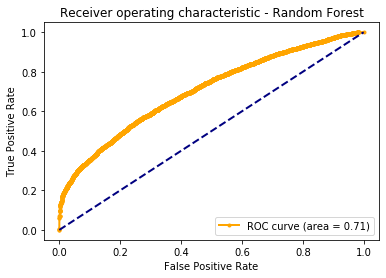

In [144]:
# plot ROC curve

y_pred_prob = RFclf.predict_proba(X_test)[:,1].tolist()

fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred_prob)


plt.plot(fpr, tpr, marker='.', color = 'orange', lw=2, label='ROC curve (area = %0.2f)' % metrics.roc_auc_score(Y_test, y_pred_prob))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('Receiver operating characteristic - Random Forest')
plt.legend(loc="lower right")
plt.show()

GBDT and Random Forest have similar AUC, use GBDT for future analysis

### Revenue Model

In [145]:
df_revenue = df_model_churn[var2 + ['revenue_net_1month', 'Churn']].copy()

In [146]:
df_revenue

,weekly_consumption_hour,age,discount_price,initial_credit_card_declined,join_fee,paid_TF,package_type_base,package_type_economy,package_type_enhanced,preferred_genre_comedy,...,daily_num_series_started_period_0,daily_num_series_started_period_1,delta_to_previous_daily_app_opens_period_1,delta_to_previous_daily_cust_service_mssgs_period_1,delta_to_previous_daily_num_videos_completed_period_1,delta_to_previous_daily_num_videos_more_than_30_seconds_period_1,delta_to_previous_daily_num_videos_rated_period_1,delta_to_previous_daily_num_series_started_period_1,revenue_net_1month,Churn
subid,,,,,,,,,,,,,,,,,,,,,
21511732,27.30145,26.00000,4.51410,False,0.03670,True,0,0,1,1,...,0.20000,0.66667,-0.06667,0.06667,0.13333,1.13333,0.00000,0.46667,3.22960,True
21639671,27.95677,45.74346,4.51410,False,0.11410,True,1,0,0,1,...,0.40000,0.12500,0.15000,0.05000,-1.00000,-1.45000,0.00000,-0.27500,4.58750,True
25100145,27.30145,60.00000,4.51410,False,0.03670,True,0,0,1,1,...,0.93333,0.96774,-0.84301,-0.20215,-0.98710,-0.57419,0.00000,0.03441,4.58750,True
27955482,27.95677,45.74346,4.51410,False,0.11410,True,0,0,1,1,...,0.64286,0.00000,-0.38235,-0.07143,-0.78571,-2.82773,0.00000,-0.64286,5.06460,True
28506369,30.20136,46.00000,4.51410,False,0.03670,True,0,0,1,0,...,1.00000,1.00000,-0.29529,-0.30769,-0.65261,-0.62035,0.00000,0.00000,5.02790,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25749000,30.20136,67.00000,4.51410,False,0.03670,True,0,1,0,0,...,0.80000,0.41935,-0.62581,-0.16989,-1.52258,-1.12688,0.00000,-0.38065,3.67000,False
27161457,27.95677,45.74346,4.51410,False,0.11410,True,1,0,0,0,...,0.00000,0.42857,0.11905,0.26190,0.92857,0.54762,0.00000,0.42857,4.58750,True
24315621,27.95677,45.74346,4.51410,False,0.11410,True,1,0,0,1,...,1.00000,1.00000,0.00000,0.25161,-0.76559,-0.57419,0.19140,0.00000,4.58750,True


In [147]:
dfX = df_revenue[var2]

df_revenue['Churn_predicted'] = GBDTclf.predict(dfX).tolist()

df_revenue['Churn_predicted_proba'] = GBDTclf.predict_proba(dfX)[:,1].tolist()

In [148]:
df_revenue

,weekly_consumption_hour,age,discount_price,initial_credit_card_declined,join_fee,paid_TF,package_type_base,package_type_economy,package_type_enhanced,preferred_genre_comedy,...,delta_to_previous_daily_app_opens_period_1,delta_to_previous_daily_cust_service_mssgs_period_1,delta_to_previous_daily_num_videos_completed_period_1,delta_to_previous_daily_num_videos_more_than_30_seconds_period_1,delta_to_previous_daily_num_videos_rated_period_1,delta_to_previous_daily_num_series_started_period_1,revenue_net_1month,Churn,Churn_predicted,Churn_predicted_proba
subid,,,,,,,,,,,,,,,,,,,,,
21511732,27.30145,26.00000,4.51410,False,0.03670,True,0,0,1,1,...,-0.06667,0.06667,0.13333,1.13333,0.00000,0.46667,3.22960,True,True,0.65020
21639671,27.95677,45.74346,4.51410,False,0.11410,True,1,0,0,1,...,0.15000,0.05000,-1.00000,-1.45000,0.00000,-0.27500,4.58750,True,True,0.86699
25100145,27.30145,60.00000,4.51410,False,0.03670,True,0,0,1,1,...,-0.84301,-0.20215,-0.98710,-0.57419,0.00000,0.03441,4.58750,True,False,0.44728
27955482,27.95677,45.74346,4.51410,False,0.11410,True,0,0,1,1,...,-0.38235,-0.07143,-0.78571,-2.82773,0.00000,-0.64286,5.06460,True,True,0.75187
28506369,30.20136,46.00000,4.51410,False,0.03670,True,0,0,1,0,...,-0.29529,-0.30769,-0.65261,-0.62035,0.00000,0.00000,5.02790,True,False,0.43315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25749000,30.20136,67.00000,4.51410,False,0.03670,True,0,1,0,0,...,-0.62581,-0.16989,-1.52258,-1.12688,0.00000,-0.38065,3.67000,False,True,0.67002
27161457,27.95677,45.74346,4.51410,False,0.11410,True,1,0,0,0,...,0.11905,0.26190,0.92857,0.54762,0.00000,0.42857,4.58750,True,True,0.75915
24315621,27.95677,45.74346,4.51410,False,0.11410,True,1,0,0,1,...,0.00000,0.25161,-0.76559,-0.57419,0.19140,0.00000,4.58750,True,True,0.50986


In [149]:
print(metrics.classification_report(df_revenue['Churn'], df_revenue['Churn_predicted']))

              precision    recall  f1-score   support

       False       0.60      0.36      0.45      8216
        True       0.71      0.87      0.78     14636

    accuracy                           0.68     22852
   macro avg       0.65      0.61      0.62     22852
weighted avg       0.67      0.68      0.66     22852



In [150]:
metrics.confusion_matrix(df_revenue['Churn'], df_revenue['Churn_predicted'], labels = [0, 1], normalize = 'true')

array([[0.36185492, 0.63814508],
       [0.13473627, 0.86526373]])

In [151]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(15, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

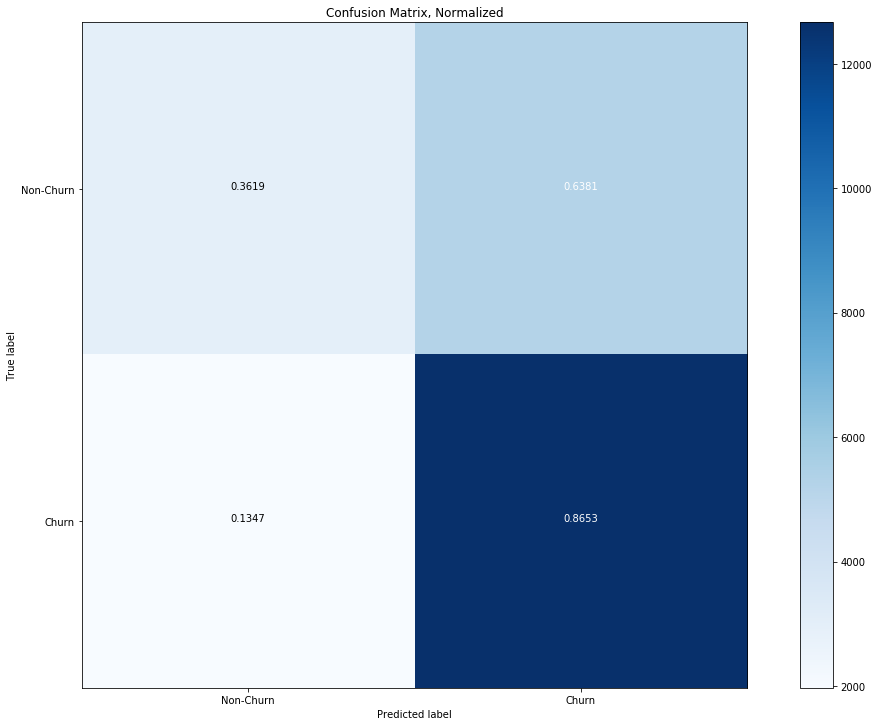

In [152]:
plot_confusion_matrix(cm= metrics.confusion_matrix(df_revenue['Churn'], df_revenue['Churn_predicted']), 
                      normalize    = True,
                      target_names = ['Non-Churn','Churn'],
                      title        = "Confusion Matrix, Normalized")

In [153]:
df_revenue[['Churn','Churn_predicted','Churn_predicted_proba']]

,Churn,Churn_predicted,Churn_predicted_proba
subid,,,
21511732,True,True,0.65020
21639671,True,True,0.86699
25100145,True,False,0.44728
27955482,True,True,0.75187
28506369,True,False,0.43315
...,...,...,...
25749000,False,True,0.67002
27161457,True,True,0.75915
24315621,True,True,0.50986


In [154]:
# As we can see, for decision boundary = 0.5, the model could capture 86% of churners
# if we change the decision boundary to 0.45

def decision_result(pred_proba, boundary):
    if pred_proba >= boundary:
        result = 1
    else:
        result = 0
        
    return result

def new_predict_result(boundary, plot):
    result = df_revenue.apply(lambda x: decision_result(x['Churn_predicted_proba'], boundary), axis = 1).tolist()
    
    if plot:
        plot_confusion_matrix(cm= metrics.confusion_matrix(df_revenue['Churn'], result), 
                          normalize    = True,
                          target_names = ['Non-Churn','Churn'],
                          title        = "Confusion Matrix, Normalized")
    else:
        return result

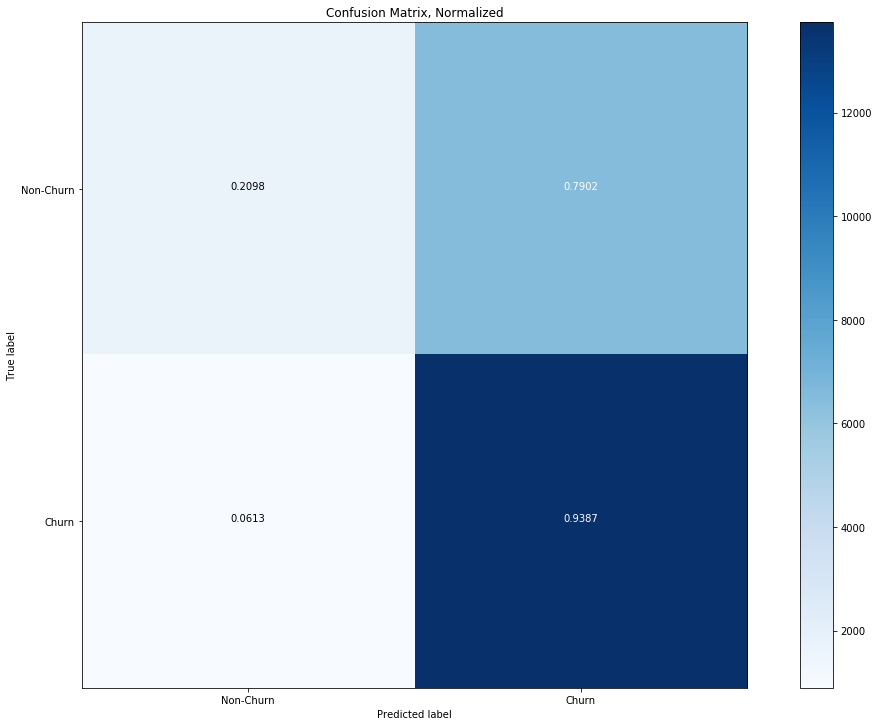

In [155]:
new_predict_result(0.45, True)

In [156]:
df_model_churn['discount_price'].value_counts()

4.51410    22755
5.02790       87
1.02760        5
4.22050        4
4.07370        1
Name: discount_price, dtype: int64

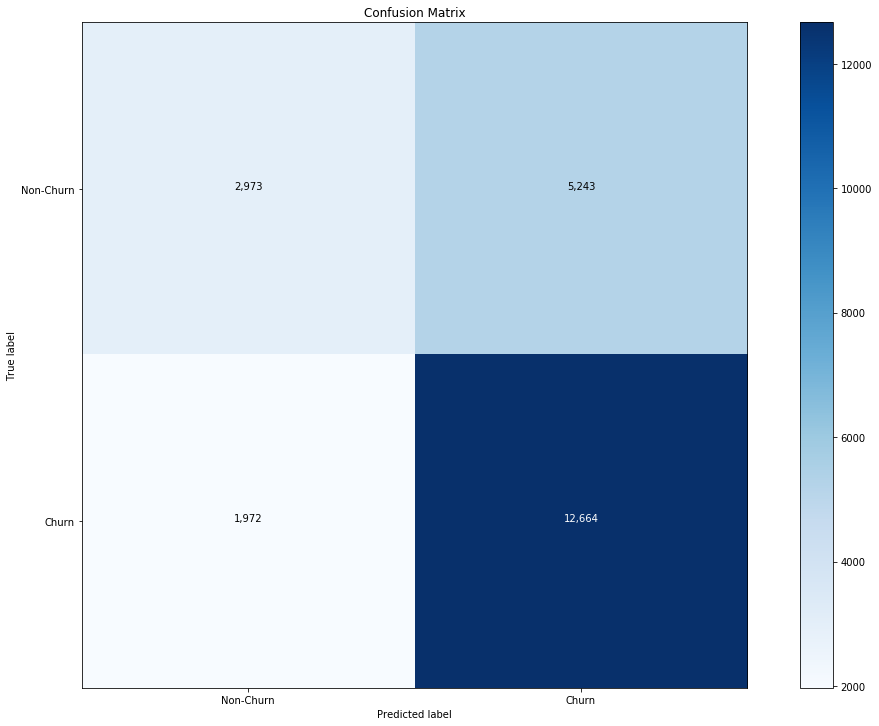

In [157]:
# Use decision boundary = 0.5, check if reduce discount price to 50% cause a difference

# Originally

plot_confusion_matrix(cm= metrics.confusion_matrix(df_revenue['Churn'], df_revenue['Churn_predicted']), 
                          normalize    = False,
                          target_names = ['Non-Churn','Churn'],
                          title        = "Confusion Matrix")

In [158]:
df_temp = df_revenue.copy()

def give_discount(pred, price, discount):
    if pred == 1:
        result = price * discount
    else:
        result = price
    
    return result

df_temp['discount_price'] = df_temp.apply(lambda x: give_discount(x['Churn_predicted'], x['discount_price'], 0.5), axis = 1) 

In [159]:
dfX = df_temp[var2]

df_revenue['Churn_predicted_discounted'] = GBDTclf.predict(dfX).tolist()

In [160]:
# See how many predicted churners will become non-churner

df_revenue.loc[(df_revenue['Churn_predicted']) & (df_revenue['Churn_predicted_discounted'] == 0)].shape[0]

0

In [161]:
# Try give them a 90% off

df_temp = df_revenue.copy()

df_temp['discount_price'] = df_temp.apply(lambda x: give_discount(x['Churn_predicted'], x['discount_price'], 0.1), axis = 1) 

dfX = df_temp[var2]

df_revenue['Churn_predicted_discounted'] = GBDTclf.predict(dfX).tolist()

df_revenue.loc[(df_revenue['Churn_predicted']) & (df_revenue['Churn_predicted_discounted'] == 0)].shape[0]

0

This result indicates that because most customers are paying a same discounted price, this factor does not influence the model result that much (i.e. in this case their are not sensitive to price change)



In [162]:
# Assume the result does not reflect the real situation, customers are price sensitive if 
# we have a larger dataset with customer from various price scheme 

'''
Assumptions
==========================
1. Customers are sensitive to price change
2. Churners have the chance to accept the discount offer equal to (1 - discount rate) and become a non-churner because of that 

'''

# We give everyone who was identified as churner by the GBDT model an 50%-off offer for their next payment period



# First, see the revenue for "doing nothing"

print('Revenue for next period if we do nothing = ${}'.format((df_revenue['revenue_net_1month'] * 4 * ~df_revenue['Churn']).sum()))
    
    

Revenue for next period if we do nothing = $144844.4772


In [163]:
# Then we see how the offer changes the result

def revenue_calc(revenue,churn, discount):
    
    '''
    inputs:
    revenue - (float) numpy array with monthly revenue inputted
    churn - (Boolean) result from prediction model to indicate whether a customer is going to churn
    discount - (float) the degree of discount of offers
    
    
    return:
    total - (float) total revenue after the offer
    
    
    '''
    
    
    from random import uniform
    
    result = []
    total = 0
    
    for r, c in zip(revenue, churn):
    
        if c == 1:
            chance = uniform(0,1)
            if chance <= (1-discount):
                temp = (r * discount, 0)
            else:
                temp = (r * discount, 1)
        else:
            temp = (r, 0)
        
        result.append(temp)
    
    for t in result:
        total += t[0]*4*t[1]
        
    return total

In [164]:
# Using a 50%-off discount offer

# run 100 simulation and get average
rev = 0
for i in range(100):
    rev += revenue_calc(df_revenue['revenue_net_1month'], df_revenue['Churn_predicted'], 0.5)

rev/100
# This result is worse than 'do-nothing'

74751.07820400511

In [165]:
# See if we can improve the revenue by changing the discount value and the decision boudary


def optimize_offer(pred_proba, n_sim):
        
    optimal = (0, 0, 0)
    
    # decision boundary range from 0.01 to 0.99 with an increment of 0.01
    for db in np.arange(0.01, 1, 0.01):
        pred_result = new_predict_result(db, False)
        
        # discount range from 0.05 to 0.95 with an increment of 0.05
        for discount in np.arange(0.05, 1, 0.05):
            rev = 0
            for i in range(n_sim):
                rev += revenue_calc(df_revenue['revenue_net_1month'], pred_result, discount)

            rev = rev/n_sim
            
            if rev >= optimal[2]:
                optimal = (db, discount, rev)
                
    return optimal

In [166]:
optimize_offer(df_revenue['Churn_predicted_proba'], 5)

(0.060000000000000005, 0.9500000000000001, 347809.6698239573)

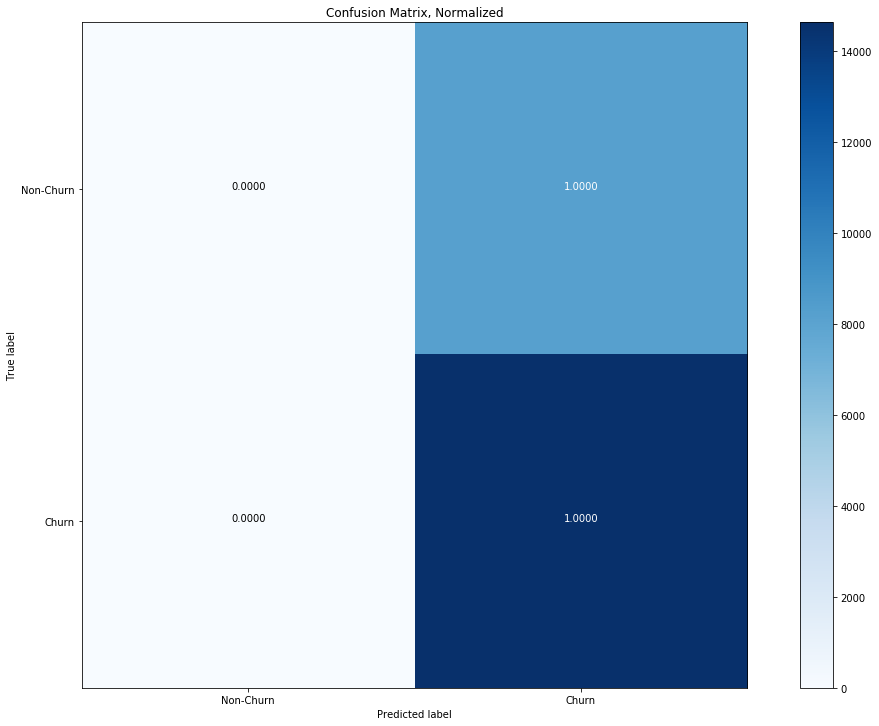

In [167]:
# Result when decision boundary is set to be 0.06

new_predict_result(0.06, True)

The result shows that using the model prediction result, the best revenue we could get is $347933.96, by setting the decision boundary to 0.06 and the discount rate to be 5% off (where offer acceptance rate = 95%)

After checking the confusion matrix, setting the decision boundary to 0.05 implies that giving every customer the offer no matter they are a churner or not, the reduction of revenue from non-churners will be offset by the additional gain from churners become non-chuners.

This analysis is quite naive because the acceptance rate is set to be (1 - discount rate). Further investigation could be done in the area of customers' price elasiticity. Then a reliable offer acceptance rate with respect of degree of discount will result a more accurate revenue modeling.

## CLV Calculation

For CLV calculation purposer, CLV will only be calculated for people who created their account recently and could only allow them to pass trial period (max_period = 1). Previous trained model will predict their churn probablity and CLV will be calculated based on this infomation.

In [198]:
def CLV_formula(payment, churn_proba, CAC, r):
    rate = ((1+r)/((1+r) - (1-churn_proba)))
    return (payment * rate - CAC)

In [199]:
# Initialize dataframe for CLV calculation

df_clv_temp = df_model.loc[(df_model['latest_eng_record_period'] != 0) & (df_model['max_period'] == 1)]

df_clv_temp['Churn'].value_counts()

# These are customers who are known to pass their trial period and currently in their paid period 1

False    20917
Name: Churn, dtype: int64

In [200]:
# Use previous model to predict their churn probability

df_clv_temp['Churn_predicted'] = GBDTclf.predict(df_clv_temp[var2]).tolist()
df_clv_temp['Churn_predicted_proba'] = GBDTclf.predict_proba(df_clv_temp[var2])[:,1].tolist()

df_clv_temp

C:\Users\mabow\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\mabow\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,weekly_consumption_hour,retarget_TF,age,discount_price,cancel_before_trial_end,initial_credit_card_declined,revenue_net,join_fee,paid_TF,refund_after_trial_TF,...,delta_to_previous_daily_num_videos_more_than_30_seconds_period_3,delta_to_previous_daily_num_videos_rated_period_1,delta_to_previous_daily_num_videos_rated_period_2,delta_to_previous_daily_num_videos_rated_period_3,delta_to_previous_daily_num_series_started_period_1,delta_to_previous_daily_num_series_started_period_2,delta_to_previous_daily_num_series_started_period_3,revenue_net_1month,Churn_predicted,Churn_predicted_proba
subid,,,,,,,,,,,,,,,,,,,,,
29726122,20.05167,False,61.00000,4.51410,False,False,4.58750,0.33030,True,False,...,0.00000,0.19355,0.00000,0.00000,0.20000,0.00000,0.00000,4.58750,True,0.51775
20299962,34.55123,False,23.00000,4.51410,False,False,3.44980,0.00000,True,False,...,0.00000,0.00000,0.00000,0.00000,-0.44946,0.00000,0.00000,3.44980,True,0.69308
29773460,27.95677,False,45.74346,4.51410,False,False,1.70802,0.11410,True,False,...,0.00000,0.00000,0.00000,0.00000,-0.29275,0.00000,0.00000,4.58750,True,0.70779
20668260,21.50162,False,49.00000,4.51410,False,False,0.00000,0.11010,True,True,...,0.00000,0.00000,0.00000,0.00000,-0.63636,0.00000,0.00000,0.00000,True,0.75502
21447938,30.20136,False,59.00000,4.51410,False,False,4.58750,0.33030,True,False,...,0.00000,0.06452,0.00000,0.00000,0.03441,0.00000,0.00000,4.58750,False,0.46982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27817975,27.95677,False,45.74346,4.51410,False,False,1.70802,0.11410,True,False,...,0.00000,0.00000,0.00000,0.00000,-0.66667,0.00000,0.00000,4.58750,True,0.77199
24382135,27.95677,False,45.74346,4.51410,False,False,1.70802,0.11410,True,False,...,0.00000,0.00000,0.00000,0.00000,-0.25000,0.00000,0.00000,4.58750,True,0.82441
21934088,28.75140,False,30.00000,4.51410,False,False,4.58750,0.11010,True,False,...,0.00000,0.00000,0.00000,0.00000,0.13333,0.00000,0.00000,4.58750,True,0.59222


In [201]:
# See prediction result using decision boundary as 0.5
df_clv_temp['Churn_predicted'].value_counts()

True     17385
False     3532
Name: Churn_predicted, dtype: int64

In [202]:
str(round((df_clv_temp['Churn_predicted'].value_counts()[1]/df_clv_temp.shape[0]) * 100,4)) + '% customers are identified as churner by prediction model.'

'83.1142% customers are identified as churner by prediction model.'

In [203]:
df_clv = df_clv_temp.reset_index()[['subid', 'revenue_net_1month', 'Churn_predicted_proba']].merge(
    df_sub_s[['subid', 'account_creation_date', 'attribution_technical', 'attribution_survey']], how = 'left', on = 'subid')

In [204]:
df_clv

,subid,revenue_net_1month,Churn_predicted_proba,account_creation_date,attribution_technical,attribution_survey
0,29726122,4.58750,0.51775,2020-02-19 18:30:15,bing,search
1,20299962,3.44980,0.69308,2020-03-05 14:52:22,email,referral
2,29773460,4.58750,0.70779,2020-03-18 23:06:25,organic,facebook
3,20668260,0.00000,0.75502,2020-03-08 20:42:05,facebook,facebook
4,21447938,4.58750,0.46982,2019-12-20 17:41:28,display,facebook
...,...,...,...,...,...,...
20912,27817975,4.58750,0.77199,2019-12-22 00:52:30,facebook,facebook
20913,24382135,4.58750,0.82441,2020-02-25 14:08:49,email,facebook
20914,21934088,4.58750,0.59222,2020-03-23 17:37:55,google_organic,tv
20915,29190645,4.58750,0.70555,2020-03-02 22:42:33,search,social_organic


In [205]:
# Look up from previous CAC calculation for each individual

def CAC_individual(c1, c2, acct_date):
    
    '''
    inputs:
    c1 -> (str) technical attribution channel for this individual 
    c2 -> (str) survey attribution channel for this indivdual
    
    return:
    result -> (float) CAC for this customer
    
    '''
    df_temp = df_CAC.loc[df_CAC['date'].dt.month == acct_date.month]
        
    if (c1 in df_temp.columns) and (c2 in df_temp.columns):
        cost = (float(df_temp[c1]) + float(df_temp[c2]))/2
    elif c1 in df_temp.columns:
        cost = float(df_temp[c1])
    elif c2 in df_temp.columns:
        cost = float(df_temp[c2])
    else:
        cost = np.nan
        
    return cost
        
        

In [206]:
df_clv['CAC'] = df_clv.apply(lambda x: CAC_individual(x['attribution_technical'], x['attribution_survey'], x['account_creation_date']),
                             axis = 1)

In [207]:
df_clv.isna().sum()

subid                       0
revenue_net_1month          0
Churn_predicted_proba       0
account_creation_date       0
attribution_technical       0
attribution_survey        427
CAC                      3283
dtype: int64

In [208]:
# Fill missing value with average CAC
df_clv['CAC'] = df_clv['CAC'].fillna(df_clv['CAC'].mean())

In [209]:
df_clv

,subid,revenue_net_1month,Churn_predicted_proba,account_creation_date,attribution_technical,attribution_survey,CAC
0,29726122,4.58750,0.51775,2020-02-19 18:30:15,bing,search,21.93878
1,20299962,3.44980,0.69308,2020-03-05 14:52:22,email,referral,42.91236
2,29773460,4.58750,0.70779,2020-03-18 23:06:25,organic,facebook,7.85851
3,20668260,0.00000,0.75502,2020-03-08 20:42:05,facebook,facebook,7.85851
4,21447938,4.58750,0.46982,2019-12-20 17:41:28,display,facebook,8.87125
...,...,...,...,...,...,...,...
20912,27817975,4.58750,0.77199,2019-12-22 00:52:30,facebook,facebook,8.87125
20913,24382135,4.58750,0.82441,2020-02-25 14:08:49,email,facebook,54.04723
20914,21934088,4.58750,0.59222,2020-03-23 17:37:55,google_organic,tv,27.09312
20915,29190645,4.58750,0.70555,2020-03-02 22:42:33,search,social_organic,18.79139


In [210]:
# Again, assuming each period is 4 month and the revenue_net_1month multiply by 4 is the actual amount received by Mevod

df_clv['CLV'] = df_clv.apply(lambda x: CLV_formula(x['revenue_net_1month'] * 4, x['Churn_predicted_proba'], x['CAC'], (0.1/12)*4),
                             axis = 1)

In [211]:
df_clv

,subid,revenue_net_1month,Churn_predicted_proba,account_creation_date,attribution_technical,attribution_survey,CAC,CLV
0,29726122,4.58750,0.51775,2020-02-19 18:30:15,bing,search,21.93878,12.46927
1,20299962,3.44980,0.69308,2020-03-05 14:52:22,email,referral,42.91236,-23.28270
2,29773460,4.58750,0.70779,2020-03-18 23:06:25,organic,facebook,7.85851,17.72642
3,20668260,0.00000,0.75502,2020-03-08 20:42:05,facebook,facebook,7.85851,-7.85851
4,21447938,4.58750,0.46982,2019-12-20 17:41:28,display,facebook,8.87125,28.81423
...,...,...,...,...,...,...,...,...
20912,27817975,4.58750,0.77199,2019-12-22 00:52:30,facebook,facebook,8.87125,14.67408
20913,24382135,4.58750,0.82441,2020-02-25 14:08:49,email,facebook,54.04723,-31.94077
20914,21934088,4.58750,0.59222,2020-03-23 17:37:55,google_organic,tv,27.09312,3.21852
20915,29190645,4.58750,0.70555,2020-03-02 22:42:33,search,social_organic,18.79139,6.87106


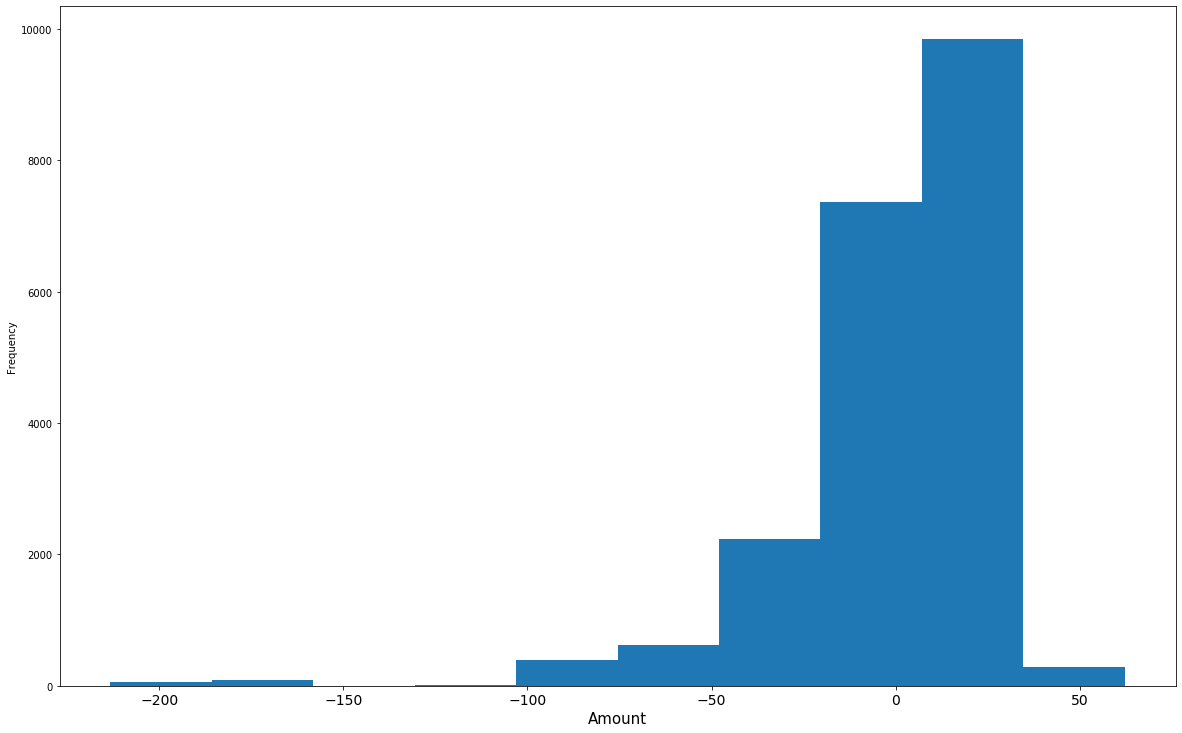

In [218]:
df_clv['CLV'].plot.hist(figsize=(20,12.5))
plt.xlabel('Amount', fontsize = 15)
plt.xticks(fontsize = 14)
plt.savefig('CLV.png')

In [212]:
# Calculate percentage of total for number of customer with positive CLV

str(round((df_clv.loc[df_clv['CLV'] > 0].shape[0]/df_clv.shape[0]) * 100, 4)) + '% customer have positive CLV'

'60.0612% customer have positive CLV'

In [213]:
df_clv['CLV'].describe()

count   20917.00000
mean       -0.53702
std        28.72658
min      -213.27684
25%        -8.87125
50%         6.18225
75%        17.34339
max        62.25054
Name: CLV, dtype: float64